# Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from tqdm.notebook import tqdm

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from pathlib import Path

In [3]:
# set width of Jupyter notebook
from IPython.core.display import HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

# set some visual properties of displaying pandas DataFrame
pd.options.display.max_columns=200
pd.options.display.max_rows=200

# Load data


In [5]:
# Load data - set index column, decimal point, separator
# timo :
#data = pd.read_csv("C:/Users/Lenovo/Documents/data-science-2/HW 1/2024_DS2_HW1_data_train.csv", sep = ',', decimal = '.', index_col = 'Booking_ID')

#data_to_score = pd.read_csv("C:/Users/Lenovo/Documents/data-science-2/HW 1/2024_DS2_HW1_data_test.csv", sep = ',', decimal = '.', index_col = 'Booking_ID')

#ondra:
data = pd.read_csv("C:/Users/ondra/Documents/Data science 2/data-science-2/HW 1/2024_DS2_HW1_data_train.csv", sep = ',', decimal = '.', index_col = 'Booking_ID')

data_to_score = pd.read_csv("C:/Users/ondra/Documents/Data science 2/data-science-2/HW 1/2024_DS2_HW1_data_test.csv", sep = ',', decimal = '.', index_col = 'Booking_ID')


# print time of data being loaded - use strftime
print(f'Data loaded on:   {datetime.datetime.now().strftime(format="%Y-%m-%d %H:%M:%S")}')

Data loaded on:   2024-04-22 15:21:14


In [6]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
Booking_ID,,,,,,,,,,,,,,,,,,
INN10204,NaN,NaN,NaN,2.0,Meal Plan 2,NaN,Room_Type 6,NaN,2018.0,9.0,NaN,Online,0.0,0.0,NaN,NaN,1.0,0.0
INN20020,NaN,NaN,NaN,2.0,Meal Plan 1,NaN,NaN,NaN,NaN,12.0,NaN,Online,0.0,0.0,0.0,NaN,NaN,0.0
INN16435,1.0,NaN,NaN,2.0,NaN,0.0,Room_Type 1,NaN,2018.0,11.0,NaN,NaN,0.0,0.0,NaN,NaN,1.0,0.0
INN07143,3.0,NaN,NaN,3.0,NaN,NaN,NaN,100.0,2018.0,5.0,NaN,Online,0.0,0.0,NaN,NaN,2.0,0.0
INN20511,1.0,0.0,1.0,1.0,Meal Plan 1,0.0,NaN,NaN,2018.0,11.0,NaN,NaN,0.0,0.0,0.0,150.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN16851,2.0,NaN,NaN,NaN,Meal Plan 1,NaN,NaN,43.0,2017.0,12.0,26.0,Offline,NaN,0.0,0.0,NaN,2.0,0.0
INN06266,1.0,NaN,NaN,2.0,Meal Plan 2,0.0,Room_Type 1,102.0,2017.0,10.0,NaN,Online,NaN,0.0,NaN,80.0,NaN,1.0
INN11285,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2018.0,5.0,NaN,Corporate,0.0,0.0,0.0,NaN,1.0,0.0


In [7]:
# Print some numbers about data sample size
print(f'Number of rows:   {data.shape[0]:,}'.replace(',', ' '))
print(f'Number of unique indexes:   {data.index.nunique():,}'.replace(',', ' '))
print(f'Number of columns:   {data.shape[1]:,}'.replace(',', ' '))

Number of rows:   32 647
Number of unique indexes:   32 647
Number of columns:   18


In [8]:
#name of the target column
data.rename(columns={'booking_status': 'TARGET'}, inplace=True)
col_target = "TARGET" 

#name of the month column
col_month = "arrival_month"


In [9]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,TARGET
Booking_ID,,,,,,,,,,,,,,,,,,
INN10204,NaN,NaN,NaN,2.0,Meal Plan 2,NaN,Room_Type 6,NaN,2018.0,9.0,NaN,Online,0.0,0.0,NaN,NaN,1.0,0.0
INN20020,NaN,NaN,NaN,2.0,Meal Plan 1,NaN,NaN,NaN,NaN,12.0,NaN,Online,0.0,0.0,0.0,NaN,NaN,0.0
INN16435,1.0,NaN,NaN,2.0,NaN,0.0,Room_Type 1,NaN,2018.0,11.0,NaN,NaN,0.0,0.0,NaN,NaN,1.0,0.0
INN07143,3.0,NaN,NaN,3.0,NaN,NaN,NaN,100.0,2018.0,5.0,NaN,Online,0.0,0.0,NaN,NaN,2.0,0.0
INN20511,1.0,0.0,1.0,1.0,Meal Plan 1,0.0,NaN,NaN,2018.0,11.0,NaN,NaN,0.0,0.0,0.0,150.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN16851,2.0,NaN,NaN,NaN,Meal Plan 1,NaN,NaN,43.0,2017.0,12.0,26.0,Offline,NaN,0.0,0.0,NaN,2.0,0.0
INN06266,1.0,NaN,NaN,2.0,Meal Plan 2,0.0,Room_Type 1,102.0,2017.0,10.0,NaN,Online,NaN,0.0,NaN,80.0,NaN,1.0
INN11285,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2018.0,5.0,NaN,Corporate,0.0,0.0,0.0,NaN,1.0,0.0


In [10]:
# check values in column TARGET
data.TARGET.value_counts(dropna=False)

TARGET
0.0    21774
1.0    10521
NaN      352
Name: count, dtype: int64

In [11]:
# we drop the observation with NaN in target
data = data.dropna(subset = ["TARGET"]) 

In [12]:
# check values in column TARGET
data.TARGET.value_counts(dropna=False)

TARGET
0.0    21774
1.0    10521
Name: count, dtype: int64

In [13]:
# define list of predictors
cols_pred = list(data.columns[0:17])

# define list of numerical predictors
cols_pred_num = [col for col in cols_pred if data[col].dtype != 'O']
# define list of categorical predictors
cols_pred_cat = [col for col in cols_pred if data[col].dtype == 'O']

print('Numerical predictors:')
print('---------------------')
print(data[cols_pred_num].dtypes)
print()
print('Categorical predictors:')
print('-----------------------')
print(data[cols_pred_cat].dtypes)

Numerical predictors:
---------------------
no_of_adults                            float64
no_of_children                          float64
no_of_weekend_nights                    float64
no_of_week_nights                       float64
required_car_parking_space              float64
lead_time                               float64
arrival_year                            float64
arrival_month                           float64
arrival_date                            float64
repeated_guest                          float64
no_of_previous_cancellations            float64
no_of_previous_bookings_not_canceled    float64
avg_price_per_room                      float64
no_of_special_requests                  float64
dtype: object

Categorical predictors:
-----------------------
type_of_meal_plan      object
room_type_reserved     object
market_segment_type    object
dtype: object


In [14]:
print(f'Number of numerical predictors {len(cols_pred_num)}.')
print(f'Number of numerical predictors {len(cols_pred_cat)}.')

Number of numerical predictors 14.
Number of numerical predictors 3.


# Data Split

In [187]:
# What is the time span of our data. Do we have some oot and hoot data? No.
print(f'Maximal year: {max(data["arrival_year"])}')
print(f'Minimal year: {min(data["arrival_year"])}')
print(f'Number of observations in 2017: {data["arrival_year"].value_counts().get(2017.0, 0)}')
print(f'Number of observations in 2018: {data["arrival_year"].value_counts().get(2018.0, 0)}')


Maximal year: 2018.0
Minimal year: 2017.0
Number of observations in  2017: 5266
Number of observations in 2018: 24064


In [15]:
data.arrival_month.value_counts(dropna=False)

arrival_month
10.0    4613
9.0     3995
8.0     3284
6.0     2795
12.0    2586
11.0    2562
7.0     2553
4.0     2376
5.0     2261
3.0     2019
2.0     1486
NaN      896
1.0      869
Name: count, dtype: int64

In [189]:
data.arrival_year.value_counts(dropna=False)

arrival_year
2018.0    24064
2017.0     5266
NaN        2965
Name: count, dtype: int64

We do not use stratiffication, because we have 896 NA for month and 2965 for year and we do not want to lose these observations. 

In [24]:
data['sample'] = 'default'

# use train_test_split to split the data into train and rest (don't forget seed)
data_train, data_rest = train_test_split(data, test_size=0.20, random_state = 42) # try 45
data.loc[data_train.index, 'sample'] = 'train'
# use train_test_split to split the rest into valid and test (don't forget seed)
data_valid, data_test = train_test_split(data_rest, test_size=0.5, random_state = 42)
data.loc[data_valid.index, 'sample'] = 'valid'
data.loc[data_test.index, 'sample'] = 'test'

C:\Users\ondra\AppData\Local\Temp\ipykernel_21328\343269876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sample'] = 'default'


In [25]:
# define function to plot default rate in time for different samples
def default_rate_in_time_per_sample(dt, col_target, col_month, col_sample):
    # group by over month and sample
    dt_grp = dt.groupby([col_month, col_sample]).agg(
        def_rt = (col_target, 'mean')
    ).reset_index()
    
    # pivot sample values to columns
    dt_grp_pivot = dt_grp.pivot(index = col_month, columns = col_sample, values = 'def_rt')

    # plot default rate in time
    lines = plt.plot(range(len(dt_grp_pivot)), dt_grp_pivot, marker = 'o')
    plt.xticks(range(len(dt_grp_pivot)), dt_grp_pivot.index, rotation = 90)
    # set legend
    plt.legend(iter(lines), tuple(dt_grp_pivot.columns), loc='best', bbox_to_anchor=(1.05, 1))
    
    plt.ylim([0, 1])
    plt.ylabel('default rate', loc='top')
    plt.xlabel('month', loc='right')
    
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.tick_params(axis='y', colors='gray')
    ax.tick_params(axis='x', colors='gray') 
    
    plt.show()

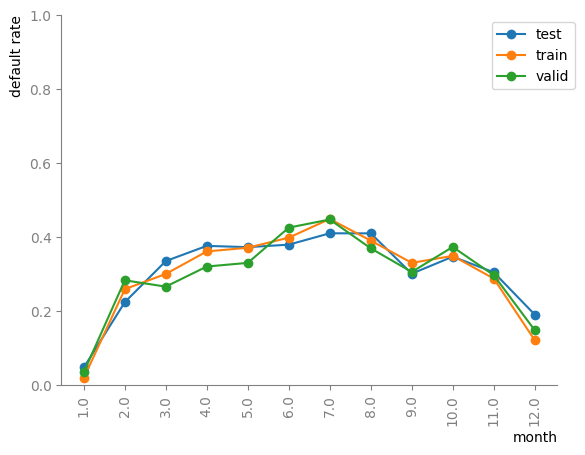

In [26]:
default_rate_in_time_per_sample(data, col_target, col_month, 'sample') 
# Even though we did not use stratification, our samples similar.  For different random_state the results would be different. 

In [27]:
# define sample masks
train_mask = (data['sample'] == 'train')
valid_mask = (data['sample'] == 'valid') 
test_mask = (data['sample'] == 'test') 

# Data preprocessing

In [28]:
# find columns with infinity values
cols_with_inf = []
for col in cols_pred_num:
    if np.any(np.isinf(data[col])):
        cols_with_inf.append(col)
        print(f'Column {col} includes infinity values.')

# find columns with negative infinity values
cols_with_neginf = []
for col in cols_pred_num:
    if np.any(np.isneginf(data[col])):
        cols_with_neginf.append(col)
        print(f'Column {col} includes negative infinity values.')

In [29]:
# replace infinity values
for col in cols_with_inf:
    data[col] = data[col].replace(np.inf, 9999999)

for col in cols_with_neginf:
    data[col] = data[col].replace(np.inf, -9999999)

In [32]:
# remove columns with too many NAN's
nan_columns=data.columns[(data.isnull().sum(axis=0)/len(data))>0.98] # think about 0.90 ad so on
cols_pred=[col for col in cols_pred if col not in nan_columns]

In [33]:
# remove columns with one unique value
unique_columns=data.columns[data.nunique()==1]
cols_pred=[col for col in cols_pred if col not in unique_columns]

In [34]:
len(cols_pred)

17

# Encode Categorical Predictors


In [35]:
# We use mean target encoding.

def mean_target_encoding(dt, predictor, target, alpha = 0.01):
    total_cnt = len(dt)
    total_dr = np.mean(dt[target])
    dt_grp = dt.groupby(predictor).agg(
        categ_dr = (target, 'mean'),
        categ_cnt = (target, len)
    )
    
    dt_grp['categ_freq'] = dt_grp['categ_cnt'] / total_cnt
    dt_grp['categ_encoding'] = (dt_grp['categ_freq'] * dt_grp['categ_dr'] + alpha * total_dr) / (dt_grp['categ_freq'] + alpha)
    
    return dt_grp[['categ_encoding']].to_dict()['categ_encoding']

In [37]:
## encoding for data

total_dr = np.mean(data[train_mask][col_target])
MTEpredictors={}
# encode categorical predictors
for pred in tqdm(cols_pred_cat):
    if len(data[pred].unique()) < 0:
        dummies = pd.get_dummies(
            data[pred], 
            prefix = pred,
            prefix_sep = '_',
            dummy_na = True if data[pred].isnull().sum() > 0 else False,
            drop_first = False
        )
        
        for d in dummies.columns:
            if d in data.columns:
                del data[d]
                
        data = data.join(dummies)
        
        for col in dummies.columns:
            if col not in cols_pred:
                cols_pred.append(col)
        
        if pred in cols_pred:
            cols_pred.remove(pred)
    else:
        new_vals = mean_target_encoding(
            dt=data[train_mask], 
            predictor=pred, 
            target=col_target
        )

        MTEpredictors[pred] = new_vals
            
        additional_values = set(data[data[pred].notnull()][pred].unique()) - set(new_vals.keys())
        for p in additional_values:
            new_vals[p] = total_dr

        data['MTE_' + pred] = data[pred].map(new_vals)
        
        if 'MTE_' + pred not in cols_pred:
            cols_pred.append('MTE_' + pred)
        
        if pred in cols_pred:
            cols_pred.remove(pred)

  0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\ondra\AppData\Local\Temp\ipykernel_21328\1121821550.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MTE_' + pred] = data[pred].map(new_vals)
C:\Users\ondra\AppData\Local\Temp\ipykernel_21328\1121821550.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MTE_' + pred] = data[pred].map(new_vals)
C:\Users\ondra\AppData\Local\Temp\ipykernel_21328\1121821550.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [38]:
## encoding for data_to_score

# encode categorical predictors
for pred in tqdm(cols_pred_cat):
    if len(data_to_score[pred].unique()) < 0:
        dummies = pd.get_dummies(
            data_to_score[pred], 
            prefix = pred,
            prefix_sep = '_',
            dummy_na = True if data_to_score[pred].isnull().sum() > 0 else False,
            drop_first = False
        )
        
        for d in dummies.columns:
            if d in data_to_score.columns:
                del data_to_score[d]
                
        data_to_score = data_to_score.join(dummies)
        
        for col in dummies.columns:
            if col not in cols_pred:
                cols_pred.append(col)
        
        if pred in cols_pred:
            cols_pred.remove(pred)
    else:
        new_vals = MTEpredictors[pred]
        MTEpredictors[pred]=new_vals
        additional_values = set(data_to_score[data_to_score[pred].notnull()][pred].unique()) - set(new_vals.keys())
        for p in additional_values:
            new_vals[p] = total_dr

        data_to_score['MTE_' + pred] = data_to_score[pred].map(new_vals)
        
        if 'MTE_' + pred not in cols_pred:
            cols_pred.append('MTE_' + pred)
        
        if pred in cols_pred:
            cols_pred.remove(pred)

  0%|          | 0/3 [00:00<?, ?it/s]

In [39]:
cols_pred

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'MTE_type_of_meal_plan',
 'MTE_room_type_reserved',
 'MTE_market_segment_type']

# XGBoost model

In [41]:
# using xgb.train 

# set best parameters to be used in XGBoost
params = {    
    'max_depth': 4,
    
    'objective': 'binary:logistic',
    'eval_metric': ['auc'],
}

evals_result = {}
booster = xgb.train(
    params = params,
    dtrain = xgb.DMatrix(data[train_mask][cols_pred], data[train_mask][col_target]),
    num_boost_round = 1000,
    evals = (
        (xgb.DMatrix(data[train_mask][cols_pred], data[train_mask][col_target]), 'train'),
        (xgb.DMatrix(data[test_mask][cols_pred], data[test_mask][col_target]), 'test'),
        (xgb.DMatrix(data[valid_mask][cols_pred], data[valid_mask][col_target]), 'valid'),        
    ),
    evals_result = evals_result,
    early_stopping_rounds = 8
)

[0]	train-auc:0.70961	test-auc:0.69094	valid-auc:0.71139
[1]	train-auc:0.74538	test-auc:0.72370	valid-auc:0.75059
[2]	train-auc:0.76269	test-auc:0.74040	valid-auc:0.76569
[3]	train-auc:0.77476	test-auc:0.75410	valid-auc:0.77709
[4]	train-auc:0.77875	test-auc:0.75741	valid-auc:0.78015
[5]	train-auc:0.78649	test-auc:0.76601	valid-auc:0.78654
[6]	train-auc:0.79077	test-auc:0.77003	valid-auc:0.78783
[7]	train-auc:0.79406	test-auc:0.77302	valid-auc:0.79167
[8]	train-auc:0.79642	test-auc:0.77580	valid-auc:0.79277
[9]	train-auc:0.79791	test-auc:0.77858	valid-auc:0.79516
[10]	train-auc:0.79897	test-auc:0.77890	valid-auc:0.79616
[11]	train-auc:0.80071	test-auc:0.78095	valid-auc:0.79851
[12]	train-auc:0.80138	test-auc:0.78200	valid-auc:0.79794
[13]	train-auc:0.80248	test-auc:0.78174	valid-auc:0.79889
[14]	train-auc:0.80387	test-auc:0.78249	valid-auc:0.79994
[15]	train-auc:0.80420	test-auc:0.78338	valid-auc:0.80043
[16]	train-auc:0.80516	test-auc:0.78352	valid-auc:0.80047
[17]	train-auc:0.80642	t

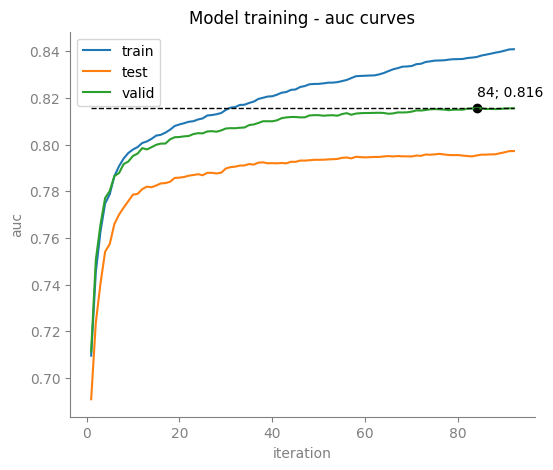

In [43]:
# ploting our results 

metric = 'auc'

fig = plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1)
total_iteration_count = len(evals_result[list(evals_result.keys())[0]][metric])
for sample, vals in evals_result.items():
    ax.plot(
        range(1, total_iteration_count + 1), 
        vals[metric],
        label=sample
    )

best_score = booster.best_score
best_iteration = booster.best_iteration+1

ax.plot([1, total_iteration_count], [best_score, best_score], color='black', ls='--', lw=1)
ax.scatter([best_iteration], [best_score], color = 'black')
ax.annotate(
    '{:d}; {:0.3f}'.format(best_iteration, best_score), 
    xy = (best_iteration, best_score), 
    xytext = (best_iteration,best_score+0.005),
)
ax.set_xlabel('iteration', color='gray')
ax.set_ylabel(metric, color='gray')
ax.legend(loc='best')
ax.set_title(f'Model training - {metric} curves')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray')

# plt.savefig('test.svg', format='svg')
# plt.close()

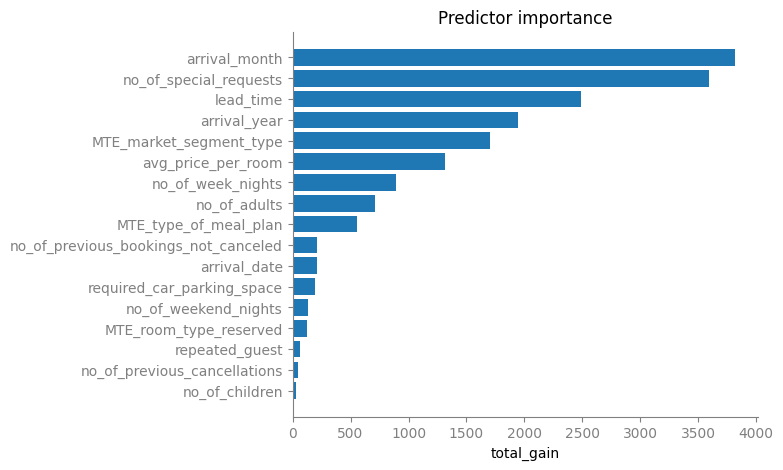

In [44]:
#ploting the most important predictors for xgb.train

importance_type = 'total_gain'

predictor_strength = sorted([(k, v) for k,v in booster.get_score(importance_type = importance_type).items()], key = lambda x: x[1], reverse = True)
predictor_strength = pd.DataFrame(predictor_strength, columns = ['predictor', 'strength'])

fig = plt.figure(figsize=(6,5))

n_strongest = 17
plt.barh(range(n_strongest, 0, -1), predictor_strength['strength'].iloc[0:20])
plt.yticks(range(n_strongest, 0, -1), predictor_strength['predictor'].iloc[0:20])
plt.xlabel(importance_type)
plt.title('Predictor importance')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray')

plt.show()

# XGBoost in sklearn

In [46]:
booster_sklearn = xgb.XGBClassifier(
    booster='gbtree',
    objective='binary:logistic',
    random_state=12,
    verbosity=1,
    eval_metric='auc',
    use_label_encoder=False,
    early_stopping_rounds=10,
)

booster_sklearn.fit(
    data[train_mask][cols_pred].values, 
    data[train_mask][col_target].astype(int).values,
    eval_set=[
        (data[train_mask][cols_pred].values, data[train_mask][col_target].values),
        (data[test_mask][cols_pred].values, data[test_mask][col_target].values),
        (data[valid_mask][cols_pred].values, data[valid_mask][col_target].values),
    ],
    verbose=True,
)

[0]	validation_0-auc:0.75720	validation_1-auc:0.73622	validation_2-auc:0.75919
[1]	validation_0-auc:0.77948	validation_1-auc:0.75234	validation_2-auc:0.77745
[2]	validation_0-auc:0.79025	validation_1-auc:0.76263	validation_2-auc:0.78511
[3]	validation_0-auc:0.79656	validation_1-auc:0.76713	validation_2-auc:0.79100
[4]	validation_0-auc:0.80158	validation_1-auc:0.77162	validation_2-auc:0.79185
[5]	validation_0-auc:0.80604	validation_1-auc:0.77439	validation_2-auc:0.79612
[6]	validation_0-auc:0.80767	validation_1-auc:0.77652	validation_2-auc:0.79703
[7]	validation_0-auc:0.81271	validation_1-auc:0.78022	validation_2-auc:0.80144
[8]	validation_0-auc:0.81413	validation_1-auc:0.78300	validation_2-auc:0.80336
[9]	validation_0-auc:0.81543	validation_1-auc:0.78506	validation_2-auc:0.80388
[10]	validation_0-auc:0.81659	validation_1-auc:0.78542	validation_2-auc:0.80495
[11]	validation_0-auc:0.81803	validation_1-auc:0.78645	validation_2-auc:0.80608
[12]	validation_0-auc:0.82104	validation_1-auc:0.7

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=12, ...)

# Not so Final Model

In [47]:
params={
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,

    'eval_metric': 'auc',
    'objective': 'binary:logistic' ,
    'booster': 'gbtree',
    'tree_method': 'exact',

    'seed': 12
}

skf = StratifiedKFold(n_splits = 2, shuffle = True, random_state = 12)

X = data[cols_pred].values
y = data[col_target].values
data['cv_score'] = -1
cv_res = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    evals_result = {}
    booster = xgb.train(
        params = params,
        dtrain = xgb.DMatrix(X_train, y_train),
        num_boost_round = 1000,
        evals = (
            (xgb.DMatrix(X_train, y_train), 'train'),
            (xgb.DMatrix(X_test, y_test), 'test'),
        ),
        evals_result = evals_result,
        early_stopping_rounds = 10,
        verbose_eval = True
    )
    
    gini_train = 2 * roc_auc_score(y_train, booster.predict(xgb.DMatrix(X_train))) - 1
    gini_test  = 2 * roc_auc_score(y_test,  booster.predict(xgb.DMatrix(X_test)))  - 1
    best_iteration = booster.best_iteration
    
    cv_res += [(gini_train, gini_test, best_iteration)]
    
    data.iloc[test_index, list(data.columns).index('cv_score')] = list(booster.predict(xgb.DMatrix(X_test), iteration_range=(0, booster.best_iteration)))

[0]	train-auc:0.68184	test-auc:0.68659
[1]	train-auc:0.69771	test-auc:0.69836
[2]	train-auc:0.73741	test-auc:0.73900
[3]	train-auc:0.73544	test-auc:0.73710
[4]	train-auc:0.74288	test-auc:0.74366
[5]	train-auc:0.75457	test-auc:0.75406
[6]	train-auc:0.75583	test-auc:0.75519
[7]	train-auc:0.76316	test-auc:0.76119
[8]	train-auc:0.76842	test-auc:0.76640
[9]	train-auc:0.76820	test-auc:0.76559
[10]	train-auc:0.76971	test-auc:0.76701
[11]	train-auc:0.76956	test-auc:0.76586
[12]	train-auc:0.76935	test-auc:0.76578
[13]	train-auc:0.77134	test-auc:0.76809
[14]	train-auc:0.77263	test-auc:0.76939
[15]	train-auc:0.77461	test-auc:0.77129
[16]	train-auc:0.77662	test-auc:0.77294
[17]	train-auc:0.77667	test-auc:0.77322


C:\Users\ondra\AppData\Local\Temp\ipykernel_21328\3701129152.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cv_score'] = -1


[18]	train-auc:0.77781	test-auc:0.77448
[19]	train-auc:0.77700	test-auc:0.77346
[20]	train-auc:0.77756	test-auc:0.77358
[21]	train-auc:0.77722	test-auc:0.77366
[22]	train-auc:0.77832	test-auc:0.77490
[23]	train-auc:0.78108	test-auc:0.77732
[24]	train-auc:0.78121	test-auc:0.77764
[25]	train-auc:0.78298	test-auc:0.77923
[26]	train-auc:0.78392	test-auc:0.78031
[27]	train-auc:0.78497	test-auc:0.78132
[28]	train-auc:0.78630	test-auc:0.78222
[29]	train-auc:0.78724	test-auc:0.78284
[30]	train-auc:0.78782	test-auc:0.78363
[31]	train-auc:0.78797	test-auc:0.78347
[32]	train-auc:0.78822	test-auc:0.78379
[33]	train-auc:0.78906	test-auc:0.78456
[34]	train-auc:0.78958	test-auc:0.78486
[35]	train-auc:0.78988	test-auc:0.78468
[36]	train-auc:0.79062	test-auc:0.78541
[37]	train-auc:0.79136	test-auc:0.78576
[38]	train-auc:0.79196	test-auc:0.78637
[39]	train-auc:0.79246	test-auc:0.78690
[40]	train-auc:0.79270	test-auc:0.78721
[41]	train-auc:0.79280	test-auc:0.78723
[42]	train-auc:0.79326	test-auc:0.78758


C:\Users\ondra\AppData\Local\Temp\ipykernel_21328\3701129152.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.71178013, 0.2475821, 0.13520777, 0.08537941, 0.42026007, 0.23584491, 0.29175153, 0.48008522, 0.22501276, 0.19469374, 0.5103391, 0.38091052, 0.70437974, 0.3761929, 0.4630575, 0.45417413, 0.079301946, 0.6223906, 0.09816344, 0.4820284, 0.28500178, 0.5244607, 0.20229107, 0.033438474, 0.0905573, 0.5251008, 0.041754596, 0.20602468, 0.036788892, 0.6211418, 0.11428447, 0.28563714, 0.1725365, 0.016759712, 0.0059821755, 0.35564062, 0.28531674, 0.7403159, 0.42679814, 0.60007447, 0.34155917, 0.3245195, 0.7057886, 0.21700555, 0.47681034, 0.12519203, 0.3180787, 0.11681918, 0.4522031, 0.52364814, 0.7140694, 0.13804229, 0.24349341, 0.049274147, 0.2713961, 0.31258142, 0.5196355, 0.06563837, 0.7742569, 0.21522933, 0.5371163, 0.18093498, 0.32311723, 0.24672353, 0.48063427, 0.044873554, 0.09982849, 0.59461963

[23]	train-auc:0.78284	test-auc:0.77531
[24]	train-auc:0.78299	test-auc:0.77547
[25]	train-auc:0.78352	test-auc:0.77536
[26]	train-auc:0.78407	test-auc:0.77590
[27]	train-auc:0.78504	test-auc:0.77635
[28]	train-auc:0.78577	test-auc:0.77717
[29]	train-auc:0.78669	test-auc:0.77740
[30]	train-auc:0.78756	test-auc:0.77838
[31]	train-auc:0.78847	test-auc:0.77924
[32]	train-auc:0.78825	test-auc:0.77908
[33]	train-auc:0.78827	test-auc:0.77914
[34]	train-auc:0.78903	test-auc:0.77944
[35]	train-auc:0.78952	test-auc:0.78016
[36]	train-auc:0.78979	test-auc:0.78064
[37]	train-auc:0.79055	test-auc:0.78129
[38]	train-auc:0.79068	test-auc:0.78116
[39]	train-auc:0.79093	test-auc:0.78147
[40]	train-auc:0.79216	test-auc:0.78261
[41]	train-auc:0.79253	test-auc:0.78291
[42]	train-auc:0.79312	test-auc:0.78343
[43]	train-auc:0.79311	test-auc:0.78346
[44]	train-auc:0.79366	test-auc:0.78404
[45]	train-auc:0.79403	test-auc:0.78443
[46]	train-auc:0.79436	test-auc:0.78472
[47]	train-auc:0.79517	test-auc:0.78546


In [48]:
# Performance during cross validation
cv_res # nejlepší gini a v jakým je řádku

[(0.6550411398671665, 0.6098680039968218, 244),
 (0.6745233783198405, 0.6113767911706884, 357)]

In [49]:
# gini manualy

gini_cv = 2 * roc_auc_score(data[col_target], data['cv_score']) - 1
print(f'Cross validation score performance: {gini_cv:.4f}.')  

Cross validation score performance: 0.6105.


In [50]:
# Still not so Final model
params = {    
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,

    'eval_metric': 'auc',
    'objective': 'binary:logistic' ,
    'booster': 'gbtree',
    'tree_method': 'exact',

    'seed': 12
}

evals_result = {}
booster = xgb.train(
    params = params,
    dtrain = xgb.DMatrix(data[cols_pred], data[col_target]),
    evals = (
        (xgb.DMatrix(data[cols_pred], data[col_target]), 'train'),
    ),
    num_boost_round = 130,
    evals_result = evals_result
)

[0]	train-auc:0.68319
[1]	train-auc:0.72357
[2]	train-auc:0.74129
[3]	train-auc:0.73985
[4]	train-auc:0.74000
[5]	train-auc:0.73952
[6]	train-auc:0.74883
[7]	train-auc:0.76306
[8]	train-auc:0.76642
[9]	train-auc:0.76719
[10]	train-auc:0.76637
[11]	train-auc:0.76592
[12]	train-auc:0.76875
[13]	train-auc:0.77230
[14]	train-auc:0.77441
[15]	train-auc:0.77450
[16]	train-auc:0.77560
[17]	train-auc:0.77548
[18]	train-auc:0.77642
[19]	train-auc:0.77669
[20]	train-auc:0.77780
[21]	train-auc:0.77875
[22]	train-auc:0.77926
[23]	train-auc:0.78015
[24]	train-auc:0.78055
[25]	train-auc:0.78121
[26]	train-auc:0.78172
[27]	train-auc:0.78228
[28]	train-auc:0.78293
[29]	train-auc:0.78301
[30]	train-auc:0.78397
[31]	train-auc:0.78398
[32]	train-auc:0.78559
[33]	train-auc:0.78554
[34]	train-auc:0.78660
[35]	train-auc:0.78724
[36]	train-auc:0.78771
[37]	train-auc:0.78857
[38]	train-auc:0.78880
[39]	train-auc:0.78929
[40]	train-auc:0.78952
[41]	train-auc:0.79036
[42]	train-auc:0.79052
[43]	train-auc:0.7916

In [51]:
gini_train = 2 * roc_auc_score(data[col_target], booster.predict(xgb.DMatrix(data[cols_pred]))) - 1
print(gini_train)

0.6139813782225296


### Final model using splitted data

In [52]:
# Final model
params = {    
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,

    'eval_metric': ['logloss', 'auc'],
    'objective': 'binary:logistic' ,
    'booster': 'gbtree',
    'tree_method': 'exact',

    'seed': 42,
}

evals_result = {}
booster = xgb.train(
    params = params,
    dtrain = xgb.DMatrix(data[train_mask][cols_pred], data[train_mask][col_target]),
    num_boost_round = 300,
    evals = (
        (xgb.DMatrix(data[train_mask][cols_pred], data[train_mask][col_target]), 'train'),
        (xgb.DMatrix(data[test_mask][cols_pred],  data[test_mask][col_target]), 'test'),
        (xgb.DMatrix(data[valid_mask][cols_pred], data[valid_mask][col_target]), 'valid')
    ),
    evals_result = evals_result,
    early_stopping_rounds = 10,
    verbose_eval = True
)

[0]	train-logloss:0.62031	train-auc:0.68846	test-logloss:0.62509	test-auc:0.66886	valid-logloss:0.61946	valid-auc:0.68490
[1]	train-logloss:0.61337	train-auc:0.71027	test-logloss:0.61887	test-auc:0.69188	valid-logloss:0.61178	valid-auc:0.71769
[2]	train-logloss:0.60535	train-auc:0.71536	test-logloss:0.61170	test-auc:0.69545	valid-logloss:0.60395	valid-auc:0.71926
[3]	train-logloss:0.59806	train-auc:0.74339	test-logloss:0.60494	test-auc:0.72117	valid-logloss:0.59686	valid-auc:0.74365
[4]	train-logloss:0.59243	train-auc:0.75372	test-logloss:0.59995	test-auc:0.73177	valid-logloss:0.59161	valid-auc:0.75131
[5]	train-logloss:0.58643	train-auc:0.76062	test-logloss:0.59388	test-auc:0.74291	valid-logloss:0.58530	valid-auc:0.76215
[6]	train-logloss:0.58127	train-auc:0.76041	test-logloss:0.58949	test-auc:0.74227	valid-logloss:0.58009	valid-auc:0.76437
[7]	train-logloss:0.57790	train-auc:0.76741	test-logloss:0.58573	test-auc:0.75091	valid-logloss:0.57647	valid-auc:0.77248
[8]	train-logloss:0.5738

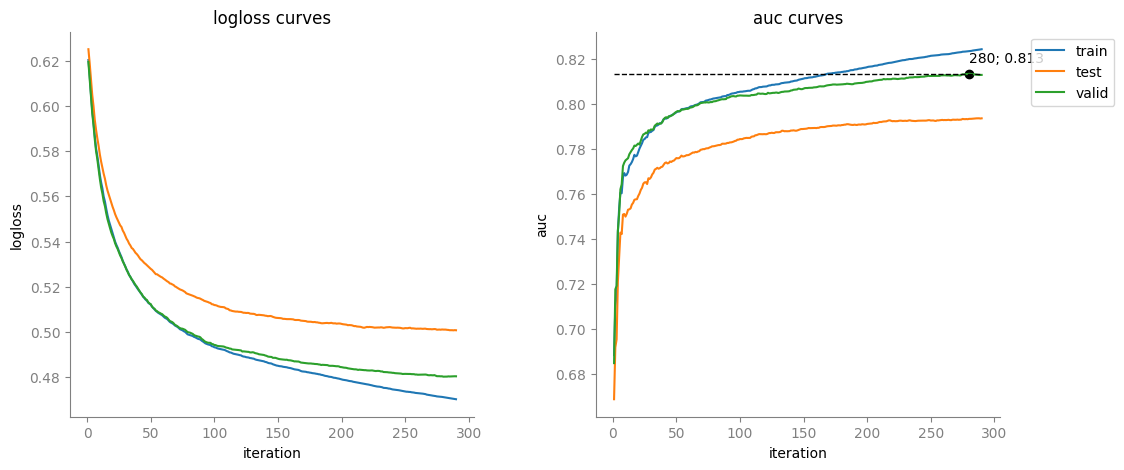

In [53]:
metric = 'logloss'

fig, axs = plt.subplots(1,2, figsize = (12,5))
plt.subplots_adjust(wspace=0.3)

total_iteration_count = len(evals_result[list(evals_result.keys())[0]][metric])
for sample, vals in evals_result.items():
    axs[0].plot(
        range(1, total_iteration_count + 1), 
        vals[metric],
        label=sample
    )

    
for sample, vals in evals_result.items():
    axs[1].plot(
        range(1, total_iteration_count + 1), 
        vals['auc'],
        label=sample
    )

best_score = booster.best_score
best_iteration = booster.best_iteration+1

plt.plot([1, total_iteration_count], [best_score, best_score], color='black', ls='--', lw=1)
plt.scatter([best_iteration], [best_score], color = 'black')
plt.annotate(
    '{:d}; {:0.3f}'.format(best_iteration, best_score), 
    xy = (best_iteration, best_score), 
    xytext = (best_iteration,best_score+0.005),
#     textcoords = 'offset points'
)

axs[0].set_xlabel('iteration')
axs[0].set_ylabel('logloss')
axs[0].set_title(f'logloss curves')

axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].spines['left'].set_color('gray')
axs[0].spines['bottom'].set_color('gray')
axs[0].tick_params(axis='y', colors='gray')
axs[0].tick_params(axis='x', colors='gray')

axs[1].set_xlabel('iteration')
axs[1].set_ylabel('auc')
axs[1].set_title(f'auc curves')

axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['left'].set_color('gray')
axs[1].spines['bottom'].set_color('gray')
axs[1].tick_params(axis='y', colors='gray')
axs[1].tick_params(axis='x', colors='gray')

plt.legend(loc='upper right',  bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))

plt.show()

# Hyperparameter optimalisation

In [217]:
# hyperparameters from which we choose in RandomizedSearchCV

params_gs = {
    'eta': [0.01,0.05,0.1,0.15,0.2],
    'max_depth': [4,5,6,7],
    'subsample': [0.6,0.75,0.9],
    'colsample_bytree': [0.6,0.75,0.9],
    'lambda': [0,1,25,50,100,400]
}

params_gs1 = {
    'eta': [0.01,0.05,0.1,0.2,0.3],
    'max_depth': [4,5,6,7],
    'subsample': [0.75,0.85,0.9,0.95],
    'colsample_bytree': [0.80,0.9],
    'lambda': [1,25,50,100]
}



In [77]:
xgb_estim = xgb.XGBClassifier(
    objective='binary:logistic',
    verbosity=0, 
    nthread=1,
    use_label_encoder=False,
)

skf = StratifiedKFold(n_splits = 2, shuffle = True, random_state = 12)

random_search = RandomizedSearchCV(
    xgb_estim, 
    param_distributions = params_gs, 
    n_iter = 12, 
    scoring = 'roc_auc', 
    n_jobs = 1, 
    cv = skf.split(data[train_mask][cols_pred].values, data[train_mask][col_target].values), 
    verbose = 3, 
    random_state = 42
)

random_search.fit(data[cols_pred].values, data[col_target].values)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2] END colsample_bytree=0.75, eta=0.01, lambda=400, max_depth=5, subsample=0.6;, score=0.750 total time=   0.4s
[CV 2/2] END colsample_bytree=0.75, eta=0.01, lambda=400, max_depth=5, subsample=0.6;, score=0.745 total time=   0.3s
[CV 1/2] END colsample_bytree=0.75, eta=0.1, lambda=50, max_depth=6, subsample=0.9;, score=0.799 total time=   0.4s
[CV 2/2] END colsample_bytree=0.75, eta=0.1, lambda=50, max_depth=6, subsample=0.9;, score=0.793 total time=   0.4s
[CV 1/2] END colsample_bytree=0.9, eta=0.01, lambda=0, max_depth=7, subsample=0.9;, score=0.795 total time=   0.6s
[CV 2/2] END colsample_bytree=0.9, eta=0.01, lambda=0, max_depth=7, subsample=0.9;, score=0.786 total time=   0.7s
[CV 1/2] END colsample_bytree=0.75, eta=0.15, lambda=1, max_depth=4, subsample=0.6;, score=0.801 total time=   0.3s
[CV 2/2] END colsample_bytree=0.75, eta=0.15, lambda=1, max_depth=4, subsample=0.6;, score=0.799 total time=   0.3s
[CV 1/2] 

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x00000171106BA810>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           nthread=1, num_parallel_tree=None, ...),
                   n_iter=12, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.6, 0.75, 0.9],
                                        'eta': [0.01, 0.05, 0.1, 0.15, 0.2],
                                        'lambda': [0, 1, 25, 50, 100, 400],
                                        'max_depth': [4, 5, 6, 7],
                                        'subsample': [0.6, 0.75, 0.9]},
                   random_state=42, scoring='roc_auc', verbose=3)

In [78]:
print(f'Best parameters:   {random_search.best_params_}')
random_search.cv_results_

Best parameters:   {'subsample': 0.9, 'max_depth': 5, 'lambda': 0, 'eta': 0.15, 'colsample_bytree': 0.75}


{'mean_fit_time': array([0.36731303, 0.3876611 , 0.58998907, 0.29497933, 0.39714897,
        0.35655546, 0.46226037, 0.54449069, 0.37419546, 0.49402905,
        0.34727859, 0.33832121]),
 'std_fit_time': array([0.03342998, 0.00697529, 0.04385626, 0.00494909, 0.00047457,
        0.01375675, 0.01713622, 0.01234066, 0.01147664, 0.00675464,
        0.01147175, 0.03138709]),
 'mean_score_time': array([0.08622897, 0.09871137, 0.12860489, 0.06729412, 0.1080544 ,
        0.09322155, 0.12781739, 0.2108655 , 0.09476042, 0.1563307 ,
        0.08576691, 0.09518528]),
 'std_score_time': array([0.00151289, 0.00099885, 0.00096369, 0.00047946, 0.00739098,
        0.00053275, 0.00179315, 0.04435372, 0.00299096, 0.01943219,
        0.00200808, 0.00448179]),
 'param_subsample': masked_array(data=[0.6, 0.9, 0.9, 0.6, 0.75, 0.75, 0.75, 0.6, 0.6, 0.9,
                    0.75, 0.9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
 

### The best results from different grid searchs bellow

- Best parameters:   {'subsample': 0.9, 'max_depth': 6, 'lambda': 300, 'eta': 0.2, 'colsample_bytree': 0.9}
- Best parameters:   {'subsample': 0.9, 'max_depth': 6, 'lambda': 25, 'eta': 0.2, 'colsample_bytree': 0.6}
- Best parameters:   {'subsample': 0.9, 'max_depth': 5, 'lambda': 0, 'eta': 0.15, 'colsample_bytree': 0.75}
- Best parameters:   {'subsample': 0.9, 'max_depth': 6, 'lambda': 300, 'eta': 0.2, 'colsample_bytree': 0.9}
- Best parameters:   {'colsample_bytree': 0.9, 'eta': 0.15, 'lambda': 1, 'max_depth': 5}
- Best parameters:   {'eta': 0.2, 'lambda': 50, 'max_depth': 6, 'subsample': 0.9}

In [79]:
grid_search = GridSearchCV(
    xgb_estim, 
    param_grid = params_gs1,  
    scoring = 'roc_auc', 
    n_jobs = 1, 
    cv = skf.split(data[train_mask][cols_pred].values, data[train_mask][col_target].values), 
    verbose = 3, 
)

grid_search.fit(data[cols_pred].values, data[col_target].values)

Fitting 2 folds for each of 640 candidates, totalling 1280 fits
[CV 1/2] END colsample_bytree=0.8, eta=0.01, lambda=1, max_depth=4, subsample=0.75;, score=0.779 total time=   0.3s
[CV 2/2] END colsample_bytree=0.8, eta=0.01, lambda=1, max_depth=4, subsample=0.75;, score=0.770 total time=   0.3s
[CV 1/2] END colsample_bytree=0.8, eta=0.01, lambda=1, max_depth=4, subsample=0.85;, score=0.779 total time=   0.3s
[CV 2/2] END colsample_bytree=0.8, eta=0.01, lambda=1, max_depth=4, subsample=0.85;, score=0.770 total time=   0.3s
[CV 1/2] END colsample_bytree=0.8, eta=0.01, lambda=1, max_depth=4, subsample=0.9;, score=0.779 total time=   0.3s
[CV 2/2] END colsample_bytree=0.8, eta=0.01, lambda=1, max_depth=4, subsample=0.9;, score=0.770 total time=   0.3s
[CV 1/2] END colsample_bytree=0.8, eta=0.01, lambda=1, max_depth=4, subsample=0.95;, score=0.778 total time=   0.3s
[CV 2/2] END colsample_bytree=0.8, eta=0.01, lambda=1, max_depth=4, subsample=0.95;, score=0.769 total time=   0.3s
[CV 1/2] E

GridSearchCV(cv=<generator object _BaseKFold.split at 0x00000171106BA960>,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=N...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, nthread=1,
                                     num_parallel_tree=None, ...),
             n_jobs=1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'eta': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'lambda': [1, 25, 50, 100], 'max_depth': [4, 5, 6, 7],
                         'subsample': [0.75, 0.85, 0.9, 0.95]},
             scoring='roc_auc', verbose=3)

In [80]:
print(f'Best parameters:   {grid_search.best_params_}')
grid_search.cv_results_

Best parameters:   {'colsample_bytree': 0.8, 'eta': 0.1, 'lambda': 1, 'max_depth': 7, 'subsample': 0.9}


{'mean_fit_time': array([0.32768202, 0.31290257, 0.32240105, 0.31224072, 0.35968995,
        0.39247048, 0.36290264, 0.3492955 , 0.44895935, 0.40608943,
        0.46392536, 0.45964825, 0.5386554 , 0.49896467, 0.49576569,
        0.49658847, 0.31191933, 0.31044257, 0.3133955 , 0.30297291,
        0.36930454, 0.35272789, 0.36471522, 0.37895572, 0.45899272,
        0.49383378, 0.46472454, 0.47337532, 0.48259866, 0.49828649,
        0.55024326, 0.49979448, 0.32145369, 0.34567785, 0.32099164,
        0.31191587, 0.36892319, 0.36783922, 0.37766778, 0.40112424,
        0.42137539, 0.42409968, 0.39877486, 0.41208708, 0.50577211,
        0.49927568, 0.50480771, 0.47536445, 0.31636941, 0.30491185,
        0.30436993, 0.30143785, 0.34783518, 0.35126245, 0.34426868,
        0.34268761, 0.39214361, 0.38916302, 0.40911329, 0.39027154,
        0.46686494, 0.48730564, 0.47067893, 0.50278342, 0.3015399 ,
        0.35826683, 0.33202469, 0.34749186, 0.34360957, 0.34242594,
        0.38580167, 0.3881861 ,

In [51]:
params_gs2 = {
    'eta': [0.1,0.125,0.15,0.2],
    'max_depth': [5,6],
    'subsample': [0.75,0.85,0.9],
#    'colsample_bytree': [0.80,0.9],
    'lambda': [250,300,350]
}
grid_search = GridSearchCV(
    xgb_estim, 
    param_grid = params_gs2,  
    scoring = 'roc_auc', 
    n_jobs = 1, 
    cv = skf.split(data[train_mask][cols_pred].values, data[train_mask][col_target].values), 
    verbose = 3, 
)

grid_search.fit(data[cols_pred].values, data[col_target].values)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV 1/2] END eta=0.1, lambda=250, max_depth=5, subsample=0.75;, score=0.788 total time=   0.1s
[CV 2/2] END eta=0.1, lambda=250, max_depth=5, subsample=0.75;, score=0.784 total time=   0.1s
[CV 1/2] END eta=0.1, lambda=250, max_depth=5, subsample=0.85;, score=0.789 total time=   0.1s
[CV 2/2] END eta=0.1, lambda=250, max_depth=5, subsample=0.85;, score=0.784 total time=   0.1s
[CV 1/2] END eta=0.1, lambda=250, max_depth=5, subsample=0.9;, score=0.789 total time=   0.1s
[CV 2/2] END eta=0.1, lambda=250, max_depth=5, subsample=0.9;, score=0.784 total time=   0.1s
[CV 1/2] END eta=0.1, lambda=250, max_depth=6, subsample=0.75;, score=0.789 total time=   0.2s
[CV 2/2] END eta=0.1, lambda=250, max_depth=6, subsample=0.75;, score=0.785 total time=   0.2s
[CV 1/2] END eta=0.1, lambda=250, max_depth=6, subsample=0.85;, score=0.790 total time=   0.2s
[CV 2/2] END eta=0.1, lambda=250, max_depth=6, subsample=0.85;, score=0.785 total tim

GridSearchCV(cv=<generator object _BaseKFold.split at 0x000002975521B140>,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=N...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, nthread=1,
                                     num_parallel_tree=None, ...),
             n_jobs=1,
             param_grid={'eta': [0.1, 0.125, 0.15, 0.2],
                         'lambda': [250, 300, 350], 'max_depth': [5, 6],
                         'subsample': [0.75, 0.85, 0.9]},
             scoring='roc_auc', verbose=3)

In [52]:
print(f'Best parameters:   {grid_search.best_params_}')
grid_search.cv_results_

Best parameters:   {'eta': 0.2, 'lambda': 250, 'max_depth': 6, 'subsample': 0.85}


{'mean_fit_time': array([0.17272103, 0.17177927, 0.18036163, 0.2226994 , 0.22293413,
        0.2203275 , 0.17895091, 0.17586458, 0.17869544, 0.22266889,
        0.21581674, 0.21317518, 0.17933035, 0.18241942, 0.18189323,
        0.22486997, 0.22087324, 0.22452092, 0.18026614, 0.17298043,
        0.16899323, 0.22168481, 0.22017121, 0.2117604 , 0.18468428,
        0.17690766, 0.17778087, 0.2176578 , 0.22422624, 0.22340941,
        0.19020808, 0.18146873, 0.18108761, 0.22072875, 0.22089386,
        0.21710432, 0.18184018, 0.17987084, 0.1709044 , 0.22351885,
        0.21686649, 0.22348523, 0.1815176 , 0.17640829, 0.18072057,
        0.21708906, 0.2256856 , 0.21102846, 0.19017065, 0.18676913,
        0.18463337, 0.2219106 , 0.2195977 , 0.21171331, 0.17771411,
        0.1771673 , 0.17725861, 0.22215617, 0.22322488, 0.21779299,
        0.18297815, 0.17355239, 0.17205191, 0.22750461, 0.22002852,
        0.21852827, 0.18829417, 0.18094683, 0.17592347, 0.22257519,
        0.22268963, 0.21650994]

In [53]:
params_gs3 = {
    'eta': [0.1,0.15,0.2],
    'max_depth': [6,7],
    'subsample': [0.75,0.9],
#    'colsample_bytree': [0.80,0.9],
    'lambda': [50,250,350]
}
grid_search = GridSearchCV(
    xgb_estim, 
    param_grid = params_gs3,  
    scoring = 'roc_auc', 
    n_jobs = 1, 
    cv = skf.split(data[train_mask][cols_pred].values, data[train_mask][col_target].values), 
    verbose = 3, 
)

grid_search.fit(data[cols_pred].values, data[col_target].values)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV 1/2] END eta=0.1, lambda=50, max_depth=6, subsample=0.75;, score=0.798 total time=   0.2s
[CV 2/2] END eta=0.1, lambda=50, max_depth=6, subsample=0.75;, score=0.793 total time=   0.2s
[CV 1/2] END eta=0.1, lambda=50, max_depth=6, subsample=0.9;, score=0.799 total time=   0.2s
[CV 2/2] END eta=0.1, lambda=50, max_depth=6, subsample=0.9;, score=0.794 total time=   0.2s
[CV 1/2] END eta=0.1, lambda=50, max_depth=7, subsample=0.75;, score=0.799 total time=   0.2s
[CV 2/2] END eta=0.1, lambda=50, max_depth=7, subsample=0.75;, score=0.794 total time=   0.2s
[CV 1/2] END eta=0.1, lambda=50, max_depth=7, subsample=0.9;, score=0.801 total time=   0.2s
[CV 2/2] END eta=0.1, lambda=50, max_depth=7, subsample=0.9;, score=0.796 total time=   0.2s
[CV 1/2] END eta=0.1, lambda=250, max_depth=6, subsample=0.75;, score=0.789 total time=   0.2s
[CV 2/2] END eta=0.1, lambda=250, max_depth=6, subsample=0.75;, score=0.785 total time=   0.2s
[

GridSearchCV(cv=<generator object _BaseKFold.split at 0x000002975521A030>,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=N...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, nthread=1,
                                     num_parallel_tree=None, ...),
             n_jobs=1,
             param_grid={'eta': [0.1, 0.15, 0.2], 'lambda': [50, 250, 350],
                         'max_depth': [6, 7], 'subsample': [0.75, 0.9]},
             scoring='roc_auc', verbose=3)

In [54]:
print(f'Best parameters:   {grid_search.best_params_}')
grid_search.cv_results_

Best parameters:   {'eta': 0.2, 'lambda': 50, 'max_depth': 6, 'subsample': 0.9}


{'mean_fit_time': array([0.2105732 , 0.21425247, 0.24939489, 0.24551439, 0.22530186,
        0.21876121, 0.25577605, 0.25322461, 0.22041774, 0.21554983,
        0.24717557, 0.25000024, 0.2403208 , 0.20983529, 0.2697587 ,
        0.24937582, 0.21689391, 0.21508098, 0.2585839 , 0.24807322,
        0.2246331 , 0.21640134, 0.2655375 , 0.26445353, 0.22305822,
        0.2164979 , 0.2746129 , 0.25487304, 0.22597921, 0.21627581,
        0.27221286, 0.2554301 , 0.22727299, 0.20694709, 0.2599144 ,
        0.24144435]),
 'std_fit_time': array([0.01142621, 0.00276327, 0.00059581, 0.0042212 , 0.00104749,
        0.00516725, 0.00736868, 0.00362086, 0.00044036, 0.00379169,
        0.00107491, 0.00012398, 0.00592434, 0.00014138, 0.00453949,
        0.00107026, 0.00747418, 0.0036428 , 0.00503743, 0.00632441,
        0.00463974, 0.00395989, 0.01350856, 0.00530732, 0.00286055,
        0.00757623, 0.0090034 , 0.01369691, 0.0031749 , 0.00331151,
        0.00144112, 0.00575221, 0.00425935, 0.00288081, 0.012

# Applying monotone constraints - DO NOT USE

In [61]:
# def marginal_dependence(data, predictor, bins, col_target):
#     dt = data.copy()
#     dt[predictor + 'bin'] = pd.qcut(dt[predictor], bins, duplicates='drop').copy()
#     dt.groupby(predictor + 'bin').agg(
#         def_rt=(col_target, np.mean),
#     ).plot(figsize=(9, 6))

In [62]:
# data.no_of_special_requests.value_counts(dropna=False)

no_of_special_requests
0.0    13498
1.0     7921
NaN     7363
2.0     2993
3.0      463
4.0       52
5.0        5
Name: count, dtype: int64

C:\Users\ondra\AppData\Local\Temp\ipykernel_272\1072758491.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dt.groupby(predictor + 'bin').agg(
C:\Users\ondra\AppData\Local\Temp\ipykernel_272\1072758491.py:4: FutureWarning: The provided callable <function mean at 0x000001B00A2788B0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dt.groupby(predictor + 'bin').agg(


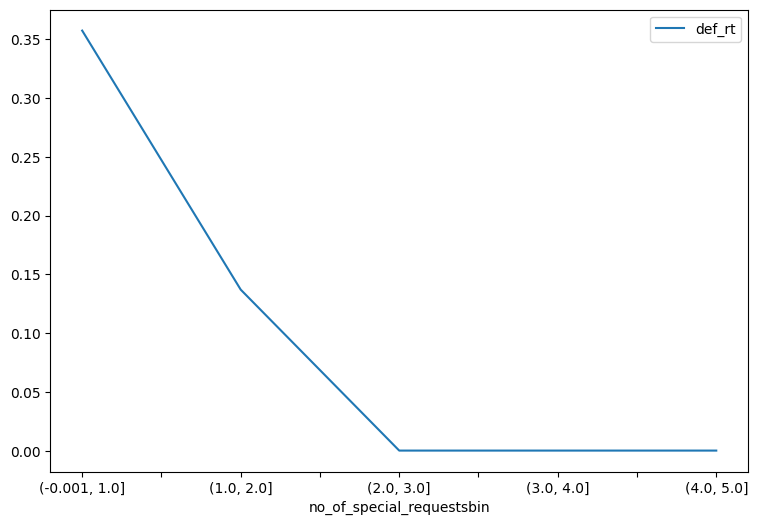

In [65]:
# marginal_dependence(data,"no_of_special_requests",1000,col_target)

C:\Users\ondra\AppData\Local\Temp\ipykernel_272\1072758491.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dt.groupby(predictor + 'bin').agg(
C:\Users\ondra\AppData\Local\Temp\ipykernel_272\1072758491.py:4: FutureWarning: The provided callable <function mean at 0x000001B00A2788B0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dt.groupby(predictor + 'bin').agg(
C:\Users\ondra\AppData\Local\Temp\ipykernel_272\1072758491.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dt.groupby

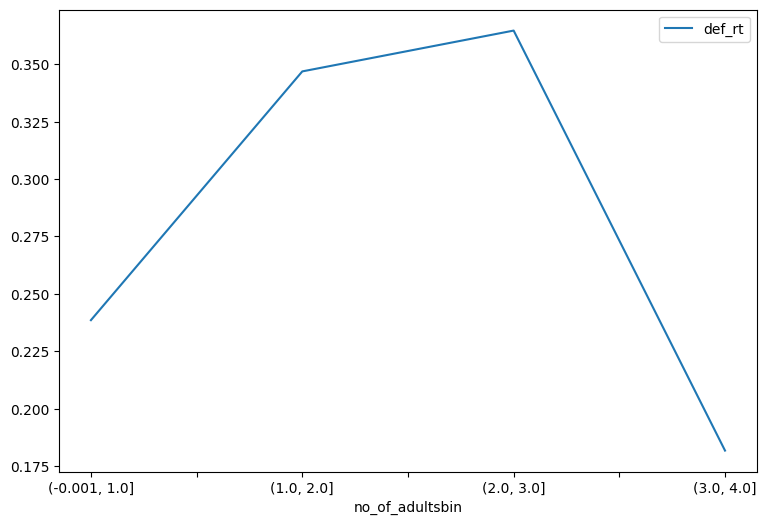

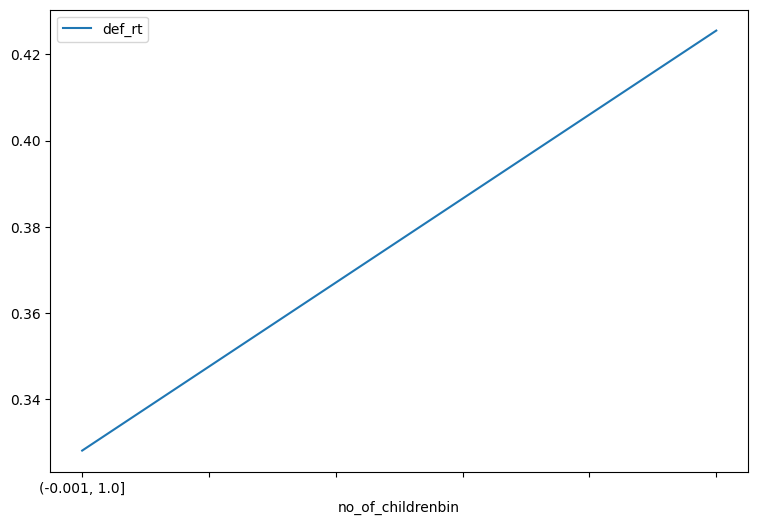

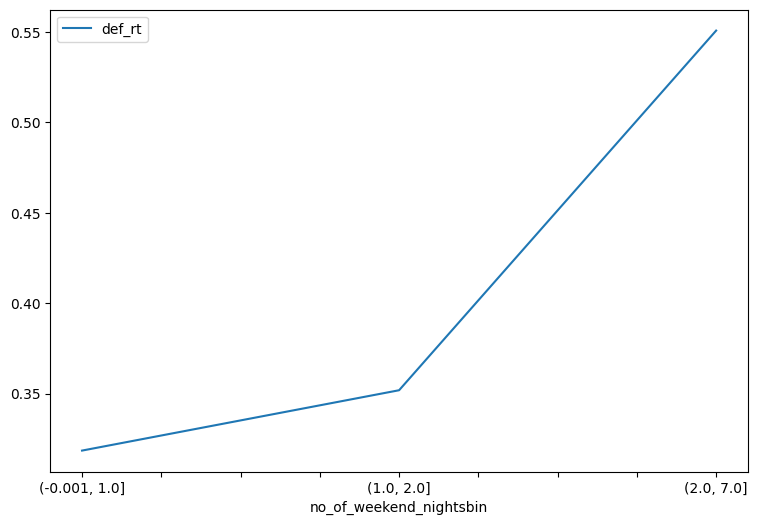

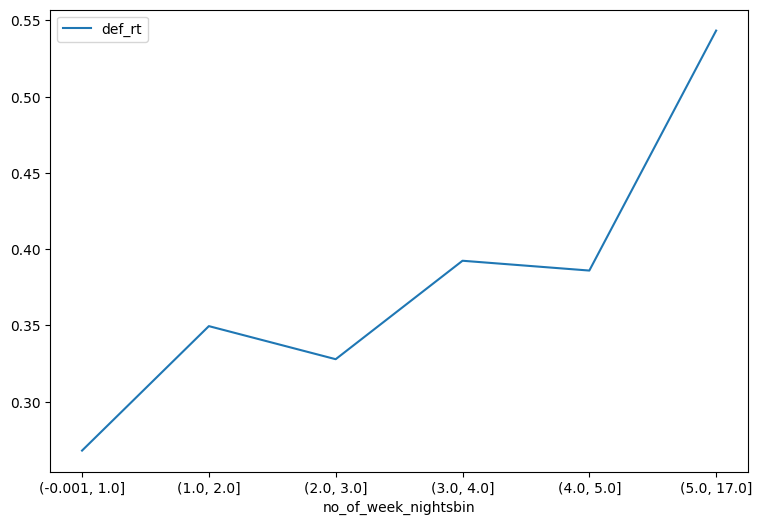

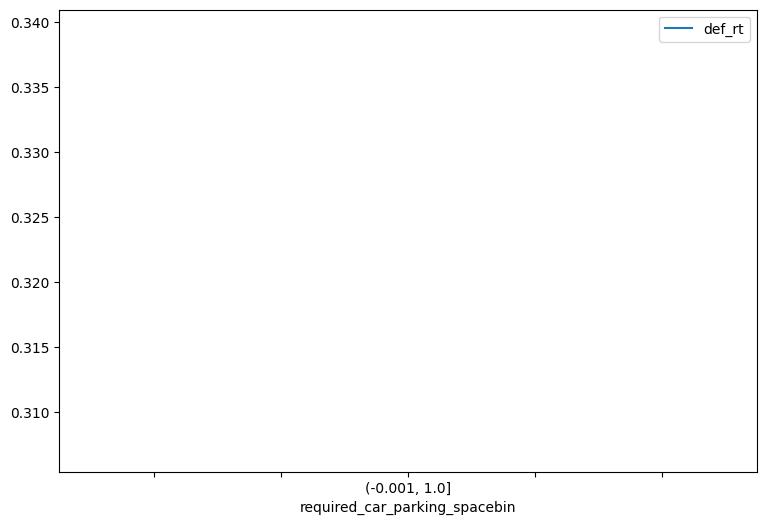

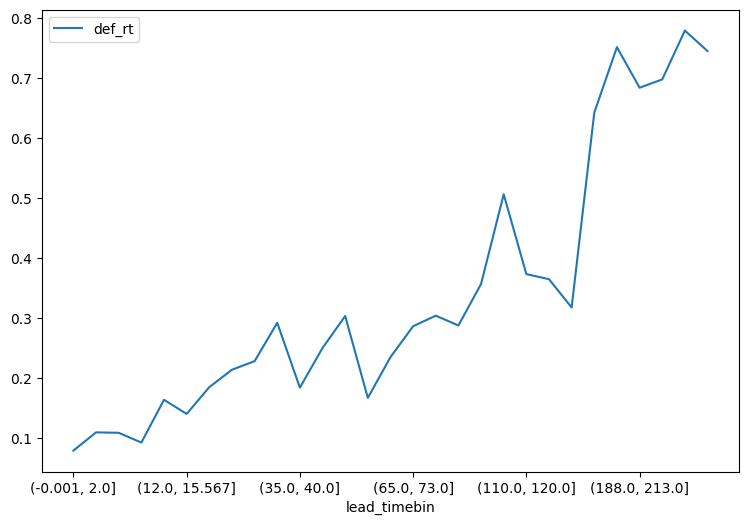

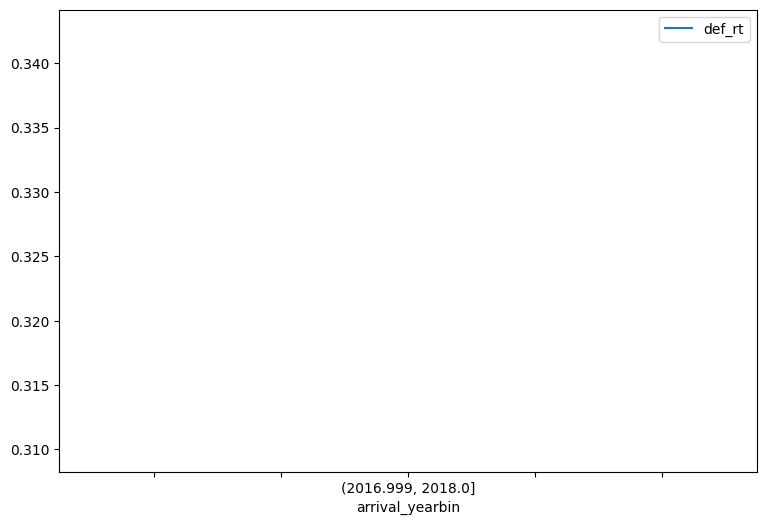

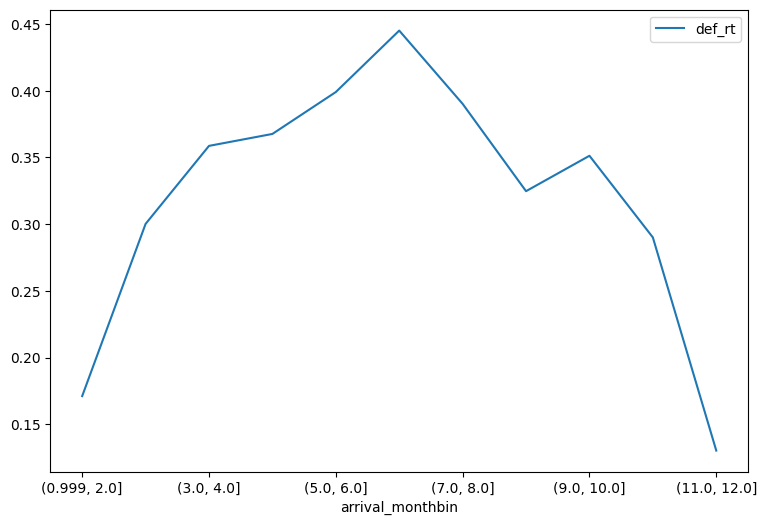

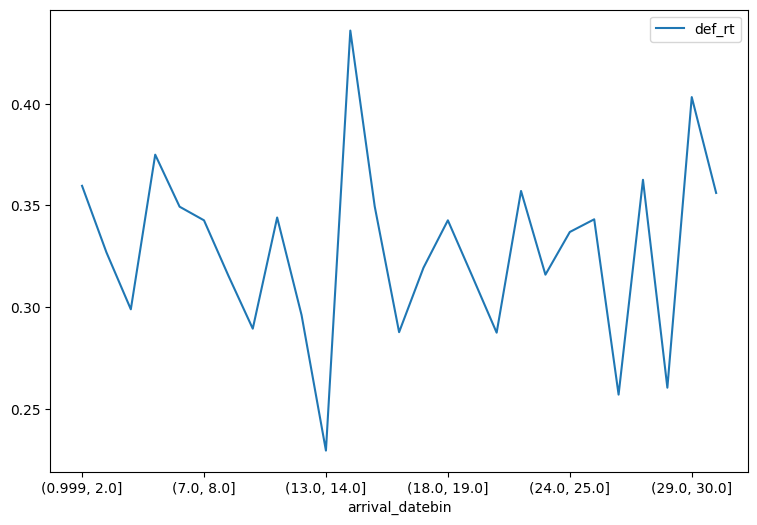

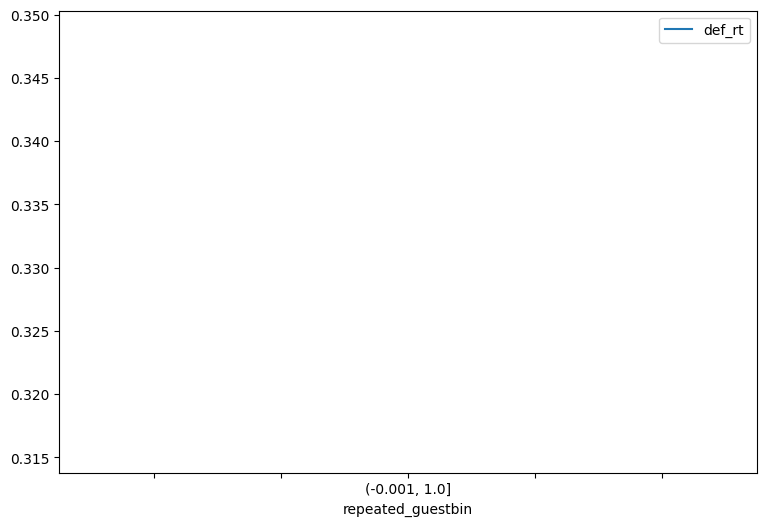

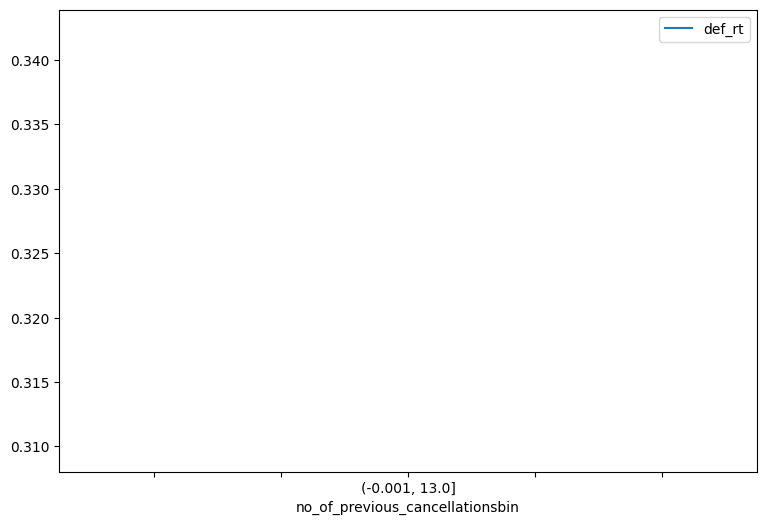

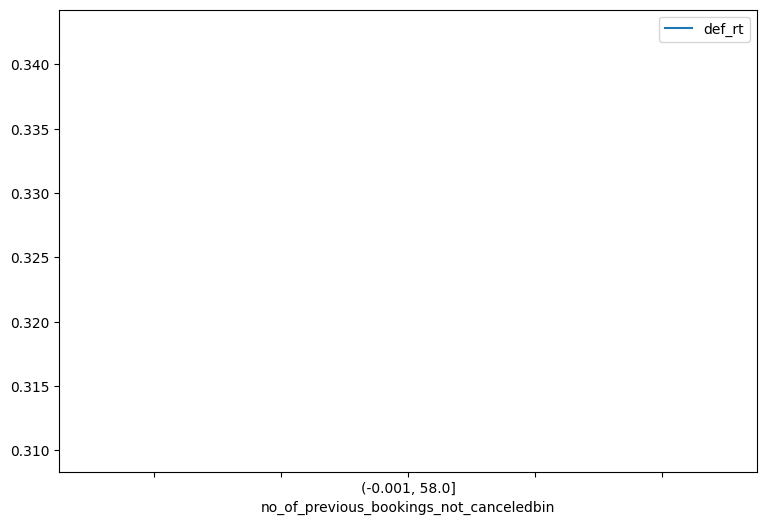

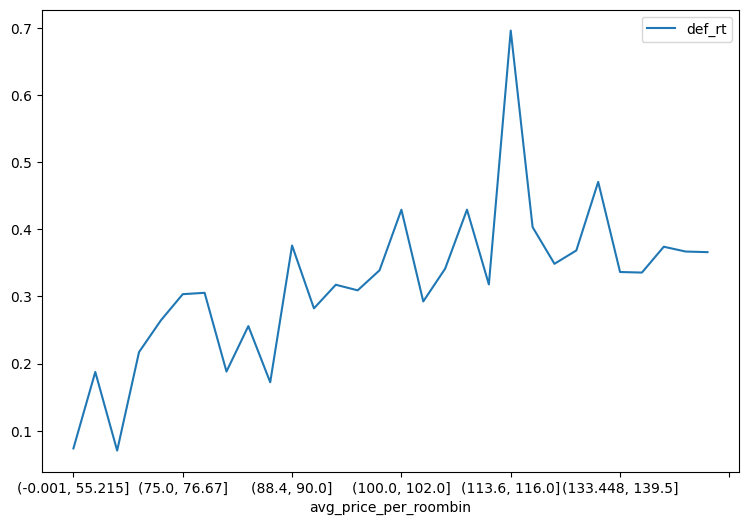

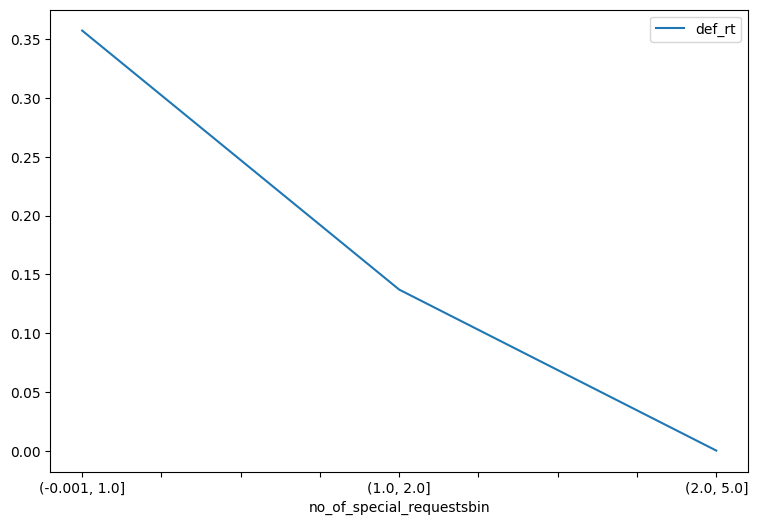

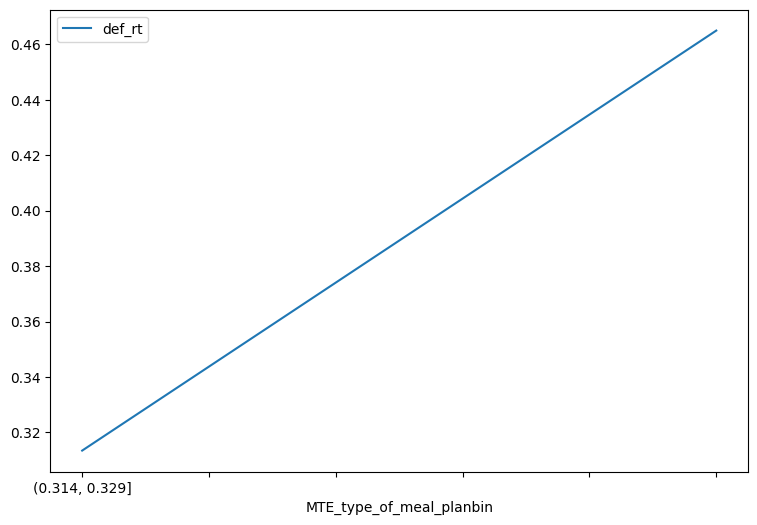

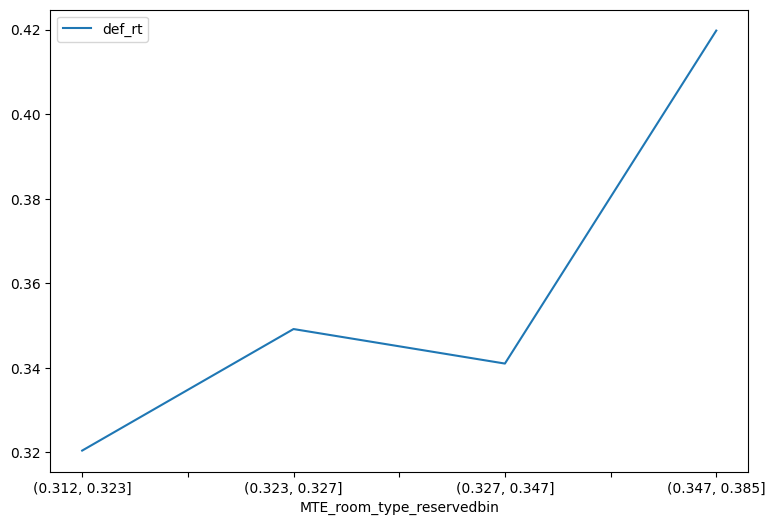

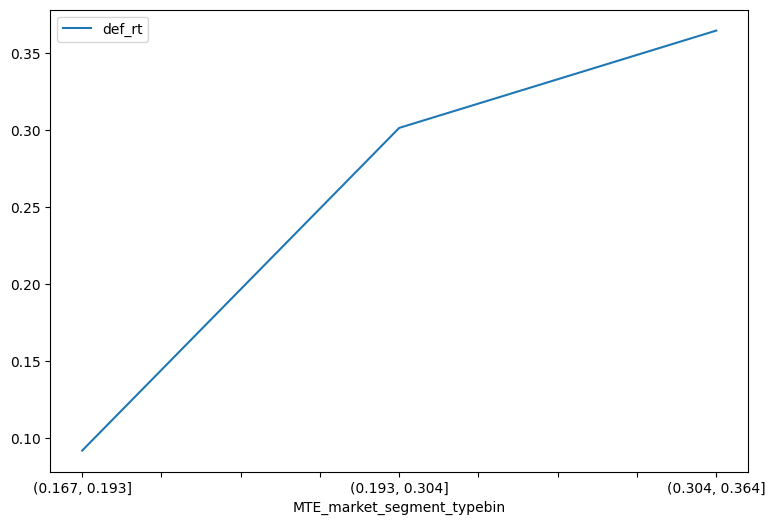

In [66]:
# for pred in cols_pred:
#     marginal_dependence(data,pred, 30 ,col_target)

In [71]:
# positive_monotone_constraint = [
# ]

# negative_monotone_constraint = [
#     'no_of_weekend_nights',
#     'no_of_week_nights'    
# ]

# constr = []
# for col in cols_pred:
#     if col in positive_monotone_constraint:
#         constr.append('1')
#     elif col in negative_monotone_constraint:
#         constr.append('-1')
#     else:
#         constr.append('0')

# constr = '(' + ','.join(constr) + ')'
# constr

'(0,0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0)'

In [54]:

params = {    
    'colsample_bytree': 0.8, 'eta': 0.1, 'lambda': 1, 'max_depth': 7, 'subsample': 0.9,
    
    'eval_metric': 'auc',
    'objective': 'binary:logistic' ,
    'booster': 'gbtree',
    'tree_method': 'exact',

    'seed': 12
}

evals_result = {}
booster = xgb.train(
    params = params,
    dtrain = xgb.DMatrix(data[train_mask][cols_pred], data[train_mask][col_target]),
    num_boost_round = 1000,
    evals = (
        (xgb.DMatrix(data[train_mask][cols_pred], data[train_mask][col_target]), 'train'),
        (xgb.DMatrix(data[test_mask][cols_pred],  data[test_mask][col_target]), 'test'),
        (xgb.DMatrix(data[valid_mask][cols_pred], data[valid_mask][col_target]), 'valid')
    ),
    evals_result = evals_result,
    early_stopping_rounds = 13,
    verbose_eval = True
)

[0]	train-auc:0.75430	test-auc:0.73856	valid-auc:0.74671
[1]	train-auc:0.76504	test-auc:0.74388	valid-auc:0.75002
[2]	train-auc:0.76591	test-auc:0.74597	valid-auc:0.75203
[3]	train-auc:0.77031	test-auc:0.75075	valid-auc:0.75807
[4]	train-auc:0.79001	test-auc:0.76686	valid-auc:0.77704
[5]	train-auc:0.79136	test-auc:0.76609	valid-auc:0.77807
[6]	train-auc:0.80048	test-auc:0.77374	valid-auc:0.78836
[7]	train-auc:0.80491	test-auc:0.77591	valid-auc:0.79344
[8]	train-auc:0.80668	test-auc:0.77687	valid-auc:0.79704
[9]	train-auc:0.80805	test-auc:0.77784	valid-auc:0.79793
[10]	train-auc:0.80825	test-auc:0.77990	valid-auc:0.79885
[11]	train-auc:0.81020	test-auc:0.78125	valid-auc:0.80007
[12]	train-auc:0.81161	test-auc:0.78173	valid-auc:0.80048
[13]	train-auc:0.81260	test-auc:0.78323	valid-auc:0.80153
[14]	train-auc:0.81388	test-auc:0.78353	valid-auc:0.80276
[15]	train-auc:0.81508	test-auc:0.78450	valid-auc:0.80345
[16]	train-auc:0.81590	test-auc:0.78476	valid-auc:0.80451
[17]	train-auc:0.81670	t

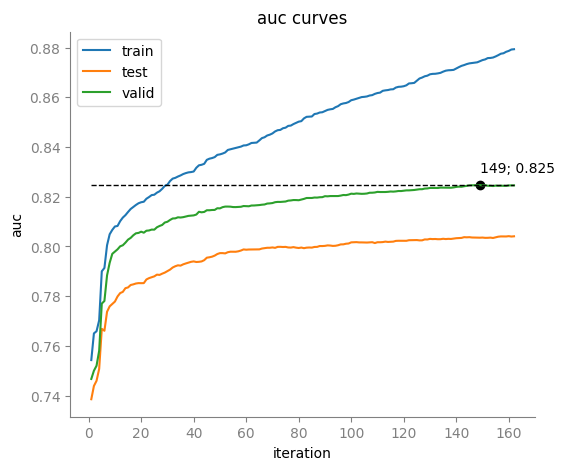

In [55]:
metric = 'auc'

fig = plt.figure(figsize=(6,5))
total_iteration_count = len(evals_result[list(evals_result.keys())[0]][metric])
for sample, vals in evals_result.items():
    plt.plot(
        range(1, total_iteration_count + 1), 
        vals[metric],
        label=sample
    )

best_score = booster.best_score
best_iteration = booster.best_iteration+1

plt.plot([1, total_iteration_count], [best_score, best_score], color='black', ls='--', lw=1)
plt.scatter([best_iteration], [best_score], color = 'black')
plt.annotate(
    '{:d}; {:0.3f}'.format(best_iteration, best_score), 
    xy = (best_iteration, best_score), 
    xytext = (best_iteration,best_score+0.005),
#     textcoords = 'offset points'
)
plt.xlabel('iteration')
plt.ylabel(metric)
plt.legend(loc='best')
plt.title(f'{metric} curves')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray')

plt.show()

# Model validation

In [56]:
data['predicted_pd'] = booster.predict(xgb.DMatrix(data[cols_pred]), iteration_range=(0,booster.best_iteration))
data['predicted_score'] = np.log(data['predicted_pd'] / (1 - data['predicted_pd']))

C:\Users\ondra\AppData\Local\Temp\ipykernel_21328\1543990203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_pd'] = booster.predict(xgb.DMatrix(data[cols_pred]), iteration_range=(0,booster.best_iteration))
C:\Users\ondra\AppData\Local\Temp\ipykernel_21328\1543990203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_score'] = np.log(data['predicted_pd'] / (1 - data['predicted_pd']))


In [57]:
data


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,TARGET,sample,MTE_type_of_meal_plan,MTE_room_type_reserved,MTE_market_segment_type,cv_score,predicted_pd,predicted_score
Booking_ID,,,,,,,,,,,,,,,,,,,,,,,,,
INN10204,NaN,NaN,NaN,2.0,Meal Plan 2,NaN,Room_Type 6,NaN,2018.0,9.0,NaN,Online,0.0,0.0,NaN,NaN,1.0,0.0,train,0.439545,0.364235,0.363433,0.711780,0.594860,0.384093
INN20020,NaN,NaN,NaN,2.0,Meal Plan 1,NaN,NaN,NaN,NaN,12.0,NaN,Online,0.0,0.0,0.0,NaN,NaN,0.0,train,0.310264,NaN,0.363433,0.187523,0.146412,-1.763026
INN16435,1.0,NaN,NaN,2.0,NaN,0.0,Room_Type 1,NaN,2018.0,11.0,NaN,NaN,0.0,0.0,NaN,NaN,1.0,0.0,train,NaN,0.319822,NaN,0.247582,0.259251,-1.049865
INN07143,3.0,NaN,NaN,3.0,NaN,NaN,NaN,100.0,2018.0,5.0,NaN,Online,0.0,0.0,NaN,NaN,2.0,0.0,train,NaN,NaN,0.363433,0.135208,0.071298,-2.566918
INN20511,1.0,0.0,1.0,1.0,Meal Plan 1,0.0,NaN,NaN,2018.0,11.0,NaN,NaN,0.0,0.0,0.0,150.0,NaN,1.0,valid,0.310264,NaN,NaN,0.213197,0.316982,-0.767678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN16851,2.0,NaN,NaN,NaN,Meal Plan 1,NaN,NaN,43.0,2017.0,12.0,26.0,Offline,NaN,0.0,0.0,NaN,2.0,0.0,train,0.310264,NaN,0.303347,0.001279,0.001884,-6.272295
INN06266,1.0,NaN,NaN,2.0,Meal Plan 2,0.0,Room_Type 1,102.0,2017.0,10.0,NaN,Online,NaN,0.0,NaN,80.0,NaN,1.0,train,0.439545,0.319822,0.363433,0.295074,0.750747,1.102599
INN11285,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2018.0,5.0,NaN,Corporate,0.0,0.0,0.0,NaN,1.0,0.0,valid,NaN,NaN,0.162953,0.135459,0.119862,-1.993734


## Score distribution

In [58]:
def plot_score_calibration(dt, col_score, col_target, n_bins = 25):
    min_score = dt[col_score].min() - 0.1
    max_score = dt[col_score].max() + 0.1
    
    bins = [round(min_score + i * (max_score - min_score) / n_bins, 2) for i in range(n_bins+1)]
    dt = dt.assign(score_bin = pd.cut(dt[col_score], bins = bins, include_lowest = False))
    
    dt_grp = dt.groupby('score_bin', observed=False).agg(
        bad_cnt = (col_target, 'sum'),
        tot_cnt = (col_target, len),
        def_rt = (col_target, 'mean'),
        avg_score = (col_score, 'mean')
    )
    dt_grp['good_cnt'] = dt_grp['tot_cnt'] - dt_grp['bad_cnt']
    dt_grp['bad_cnt_norm'] = dt_grp['bad_cnt'] / dt_grp['tot_cnt']
    dt_grp['good_cnt_norm'] = dt_grp['good_cnt'] / dt_grp['tot_cnt']
    dt_grp['expected_pd'] = 1 / (1 + np.exp(-dt_grp['avg_score']))
    
    fig, axs = plt.subplots(1,2, figsize = (12,4))
    fig.suptitle(col_score)
    plt.subplots_adjust(wspace = 0.4)
    axs[0].bar(range(len(dt_grp)), dt_grp['bad_cnt'], color = 'salmon', label = 'bads')
    axs[0].bar(range(len(dt_grp)), dt_grp['good_cnt'], bottom = dt_grp['bad_cnt'], color = 'lightblue', label = 'goods')
    axs[0].set_ylabel('observations count')
    axs[0].set_xlabel('score')
    axs[0].set_xticks(range(len(dt_grp)))
    axs[0].set_xticklabels(dt_grp.index, rotation = 90)
    
    axs[0].spines['right'].set_color('gray')
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['left'].set_color('gray')
    axs[0].spines['bottom'].set_color('gray')
    axs[0].tick_params(axis='y', colors='gray')
    axs[0].tick_params(axis='x', colors='gray')
    
    ax0l = axs[0].twinx()
    ax0l.plot(range(len(dt_grp)), dt_grp['def_rt'], marker = 'o', color = 'red')
    ax0l.plot(range(len(dt_grp)), dt_grp['expected_pd'], color = 'black', ls = '--')
    ax0l.set_ylabel('default rate', color = 'red')
    
    ax0l.spines['right'].set_color('gray')
    ax0l.spines['top'].set_visible(False)
    ax0l.spines['left'].set_color('gray')
    ax0l.spines['bottom'].set_color('gray')
    ax0l.tick_params(axis='y', colors='gray')
    ax0l.tick_params(axis='x', colors='gray')
    
    axs[1].bar(range(len(dt_grp)), dt_grp['bad_cnt_norm'], color = 'salmon', label = 'bads')
    axs[1].bar(range(len(dt_grp)), dt_grp['good_cnt_norm'], bottom = dt_grp['bad_cnt_norm'], color = 'lightblue', label = 'goods')
    axs[1].set_ylabel('frequency')
    axs[1].set_xlabel('score')
    axs[1].set_xticks(range(len(dt_grp)))
    axs[1].set_xticklabels(dt_grp.index, rotation = 90)
    
    axs[1].spines['right'].set_visible(False)
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['left'].set_color('gray')
    axs[1].spines['bottom'].set_color('gray')
    axs[1].tick_params(axis='y', colors='gray')
    axs[1].tick_params(axis='x', colors='gray')

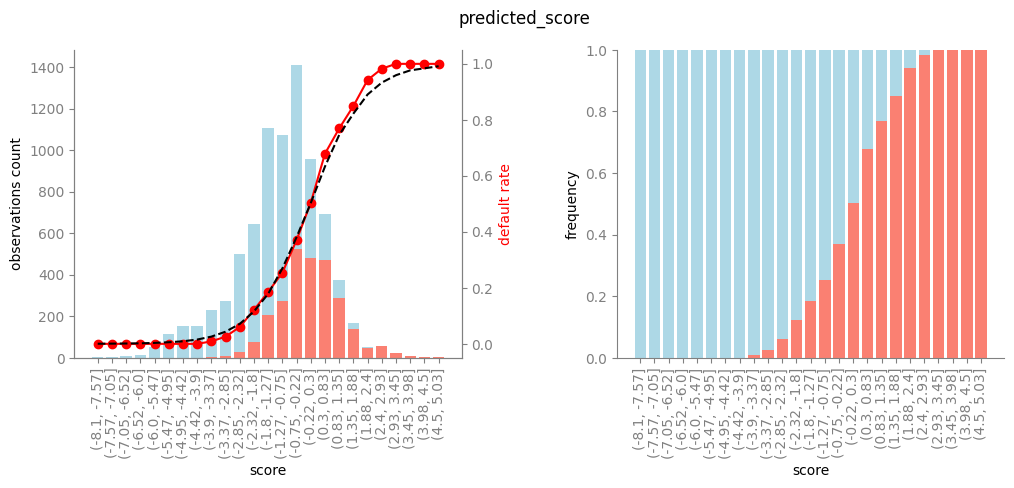

In [87]:
plot_score_calibration(data[valid_mask | test_mask], 'predicted_score', col_target)

## Permutation importance


In [59]:
from sklearn.inspection import permutation_importance

In [60]:
# for sklearn, there is a function
r = permutation_importance(booster_sklearn, data[test_mask][cols_pred], data[test_mask][col_target], n_repeats=6)

In [61]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{cols_pred[i]:<8}    "
              f"{r.importances_mean[i]:.4f}"
              f" +/- {r.importances_std[i]:.4f}")

no_of_special_requests    0.0807 +/- 0.0050
arrival_month    0.0410 +/- 0.0040
arrival_year    0.0303 +/- 0.0016
lead_time    0.0261 +/- 0.0038
MTE_market_segment_type    0.0234 +/- 0.0030
avg_price_per_room    0.0116 +/- 0.0036
no_of_week_nights    0.0094 +/- 0.0016
no_of_adults    0.0093 +/- 0.0028
MTE_type_of_meal_plan    0.0049 +/- 0.0012


In [62]:
def permutation_importance(dt, predictor, target, model, n_iters = 10):
    predictors = list(dt.columns)
    predictors.remove(target)
    
    prediction = model.predict(xgb.DMatrix(dt[predictors]), iteration_range=(0,model.best_iteration))
    s = roc_auc_score(dt[target], prediction)
    
    sk = []
    for i in range(n_iters):
        x = dt[predictor].to_list()
        np.random.shuffle(x)
        dt[predictor] = x
        prediction = model.predict(xgb.DMatrix(dt[predictors]), iteration_range=(0,model.best_iteration))
        sk.append(roc_auc_score(dt[target], prediction))
    
    sk_mean = np.mean(sk)
    sk_perc05 = np.percentile(sk, q=5)
    sk_perc95 = np.percentile(sk, q=95)
    
    return s - sk_mean, s - sk_perc05, s - sk_perc95    

In [65]:
res = []
for pred in tqdm(cols_pred):
    pi, iqr95, iqr05 = permutation_importance(
        dt=data[test_mask][cols_pred + [col_target]], 
        predictor=pred,
        target=col_target,
        model=booster,
        n_iters=10
    )
    res.append((pred, pi, iqr05, iqr95))
res = pd.DataFrame(res, columns = ['predictor', 'permutation_importance', 'iqr05', 'iqr95'])
res

  0%|          | 0/17 [00:00<?, ?it/s]

,predictor,permutation_importance,iqr05,iqr95
0,no_of_adults,0.011563,0.009576,0.013960
1,no_of_children,-0.000395,-0.000770,0.000290
2,no_of_weekend_nights,0.001490,-0.000501,0.002771
3,no_of_week_nights,0.015445,0.013203,0.016980
4,required_car_parking_space,0.003383,0.001056,0.006211
5,lead_time,0.046421,0.039445,0.052394
6,arrival_year,0.044526,0.040579,0.050838
7,arrival_month,0.079348,0.070607,0.084363
8,arrival_date,0.001409,0.000395,0.002646
9,repeated_guest,0.001512,0.000233,0.003268


## Marginal contribution

In [66]:
def fit_model(predictors):
    params={
        'colsample_bytree': 0.8, 'eta': 0.1, 'lambda': 1, 'max_depth': 7, 'subsample': 0.9,

        'eval_metric': 'auc',
        'objective': 'binary:logistic' ,
        'booster': 'gbtree',
        'tree_method': 'hist',

        'base_score': 0.08,

        'seed': 12
    }

    evals_result = {}

    booster_mc = xgb.train(
        params = params,
        dtrain = xgb.DMatrix(data[train_mask][predictors], data[train_mask][col_target]),
        num_boost_round = 1000,
        evals = (
            (xgb.DMatrix(data[train_mask][predictors], data[train_mask][col_target]), 'train'),
            (xgb.DMatrix(data[test_mask][predictors], data[test_mask][col_target]), 'test'),
            (xgb.DMatrix(data[valid_mask][predictors], data[valid_mask][col_target]), 'valid')
        ),
        evals_result = evals_result,
        early_stopping_rounds = 20
    )
    
    
    prediction = booster_mc.predict(xgb.DMatrix(data[test_mask][predictors]))
    return roc_auc_score(data[test_mask][col_target], prediction)

prediction = booster.predict(xgb.DMatrix(data[test_mask][cols_pred]), iteration_range=(0,booster.best_iteration))
auc_base = roc_auc_score(data[test_mask][col_target], prediction)

marginal_contribution = []
for pred in tqdm(cols_pred):
    auc = fit_model(predictors=[p for p in cols_pred if p != pred])
    marginal_contribution.append((pred, auc_base - auc))

  0%|          | 0/17 [00:00<?, ?it/s]

[0]	train-auc:0.75529	test-auc:0.73072	valid-auc:0.76013
[1]	train-auc:0.77672	test-auc:0.75314	valid-auc:0.77686
[2]	train-auc:0.78516	test-auc:0.75978	valid-auc:0.78642
[3]	train-auc:0.79009	test-auc:0.76255	valid-auc:0.79008
[4]	train-auc:0.79268	test-auc:0.76432	valid-auc:0.79190
[5]	train-auc:0.79797	test-auc:0.76770	valid-auc:0.79643
[6]	train-auc:0.79996	test-auc:0.76785	valid-auc:0.79819
[7]	train-auc:0.80376	test-auc:0.77246	valid-auc:0.80092
[8]	train-auc:0.80411	test-auc:0.77249	valid-auc:0.80144
[9]	train-auc:0.80732	test-auc:0.77535	valid-auc:0.80283
[10]	train-auc:0.80987	test-auc:0.77684	valid-auc:0.80400
[11]	train-auc:0.81079	test-auc:0.77672	valid-auc:0.80457
[12]	train-auc:0.81246	test-auc:0.77842	valid-auc:0.80555
[13]	train-auc:0.81428	test-auc:0.77997	valid-auc:0.80677
[14]	train-auc:0.81550	test-auc:0.78099	valid-auc:0.80680
[15]	train-auc:0.81730	test-auc:0.78276	valid-auc:0.80793
[16]	train-auc:0.81905	test-auc:0.78377	valid-auc:0.80853
[17]	train-auc:0.81948	t

In [67]:
marginal_contribution = sorted(marginal_contribution, key=lambda x: x[1], reverse=False)

In [68]:
marginal_contribution

[('MTE_room_type_reserved', -0.0029525564136411164),
 ('arrival_date', -0.0018442921140433555),
 ('no_of_previous_bookings_not_canceled', -0.0017529111968040967),
 ('required_car_parking_space', -0.001740351734245249),
 ('no_of_children', -0.0014540826048845545),
 ('no_of_weekend_nights', -0.0008369365998329714),
 ('repeated_guest', 0.0008410509065335248),
 ('no_of_previous_cancellations', 0.0011868692118200963),
 ('MTE_type_of_meal_plan', 0.0017238945074438128),
 ('avg_price_per_room', 0.00525916667532822),
 ('no_of_adults', 0.005747903002837673),
 ('no_of_week_nights', 0.009274513472405599),
 ('MTE_market_segment_type', 0.014067897320763523),
 ('lead_time', 0.015632633121641426),
 ('arrival_year', 0.02096260918070736),
 ('arrival_month', 0.027293011395330247),
 ('no_of_special_requests', 0.06669096273044439)]

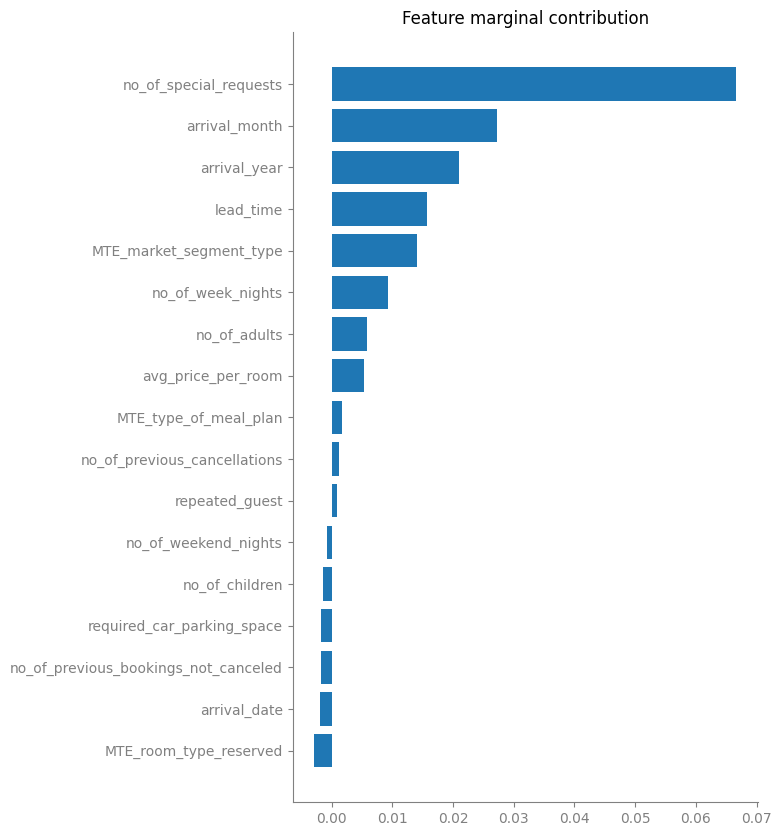

In [69]:
# feature_perm_importance = sorted(zip(cols_pred, pi['importances_mean']), key=lambda x: x[1], reverse=False)

plt.figure(figsize=(6,10))
ax = plt.subplot(1,1,1)
ax.barh(range(len(marginal_contribution)), [imp for p, imp in marginal_contribution])
ax.set_yticks(range(len(marginal_contribution)))
ax.set_yticklabels([p for p, imp in marginal_contribution])

ax.set_title('Feature marginal contribution')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

plt.show()

In [70]:
data.no_of_previous_cancellations.value_counts(dropna=False)
data.no_of_previous_bookings_not_canceled.value_counts(dropna=False)

no_of_previous_bookings_not_canceled
0.0     17414
NaN     14465
1.0       119
2.0        56
4.0        37
3.0        32
5.0        26
6.0        19
7.0        15
8.0        15
10.0       11
9.0         9
11.0        9
12.0        6
18.0        5
19.0        5
16.0        4
14.0        4
15.0        4
24.0        3
17.0        3
21.0        2
29.0        2
27.0        2
23.0        2
13.0        2
31.0        2
32.0        2
36.0        1
45.0        1
35.0        1
52.0        1
58.0        1
28.0        1
50.0        1
25.0        1
22.0        1
44.0        1
30.0        1
48.0        1
56.0        1
47.0        1
33.0        1
43.0        1
38.0        1
34.0        1
20.0        1
26.0        1
Name: count, dtype: int64

## PDP plots


In [71]:
def partial_dependency(bst, X, y, feature_names, feature_ids = [], f_id = -1):

    """
    Calculate the dependency (or partial dependency) of a response variable on a predictor (or multiple predictors)
    1. Sample a grid of values of a predictor.
    2. For each value, replace every row of that predictor with this value, calculate the average prediction.
    """
    X_temp = X.copy()
    grid = np.linspace(
        np.percentile(X_temp[:, f_id], 0.1),
        np.percentile(X_temp[:, f_id], 99.5),
        50
    )
    y_pred = np.zeros(len(grid))

    if len(feature_ids) == 0 or f_id == -1:
        print ('Input error!')
        return
    else:
        for i, val in enumerate(grid):

            X_temp[:, f_id] = val
            data = xgb.DMatrix(X_temp, feature_names = feature_names)

            y_pred[i] = np.average(bst.predict(data))

    return grid, y_pred

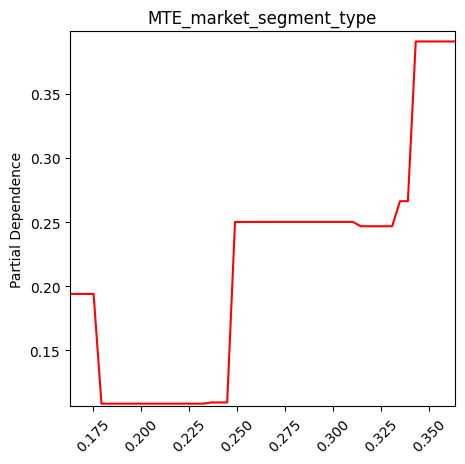

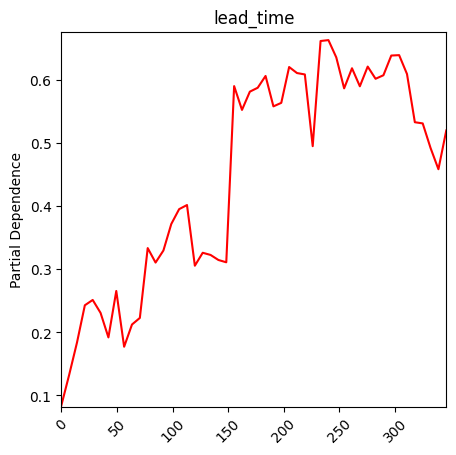

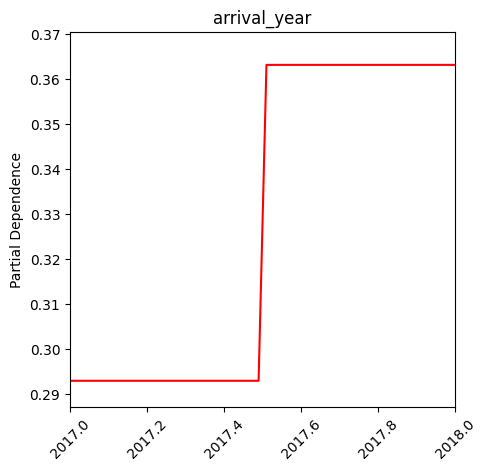

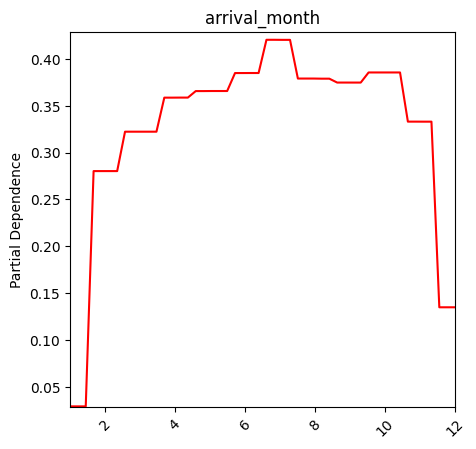

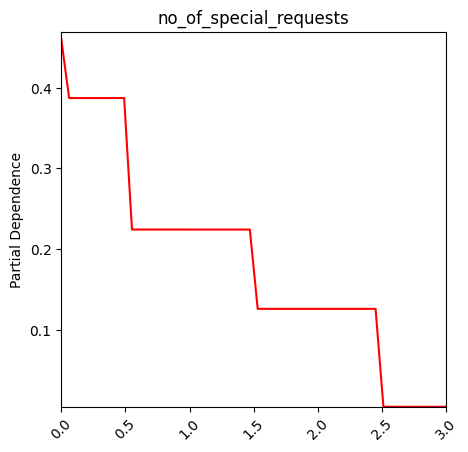

In [72]:
lst_f = ['MTE_market_segment_type',
'lead_time',
'arrival_year',
'arrival_month',
'no_of_special_requests',
        ]
# cols_pred
sampled_data = data.sample(frac=0.1, random_state=22)
for f in lst_f:
    f_id = cols_pred.index(f)
    feature_ids = range(len(cols_pred))

    mask = sampled_data[f].notnull()
    grid, y_pred = partial_dependency(
        booster,
        sampled_data[mask][cols_pred].values,
        sampled_data[mask][col_target].values,
        feature_names = cols_pred,
        feature_ids = feature_ids,
        f_id = f_id
    )

    fig, ax = plt.subplots()
    fig.set_size_inches(5, 5)
    plt.subplots_adjust(left = 0.17, right = 0.94, bottom = 0.15, top = 0.9)

    ax.plot(grid, y_pred, ls = '-', color = 'red', linewidth = 1.5, label='fit')

    ax.set_xlim(min(grid), max(grid))
    ax.set_ylim(0.98 * min(y_pred), 1.02 * max(y_pred))

    ax.set_title(f)
    ax.set_ylabel('Partial Dependence')
    plt.xticks(rotation=45)

    plt.show()

## ICE plots


In [73]:
def ice_data(bst, dt, predictor, n_points=20):
    X = dt.copy()
    grid = np.linspace(
        dt[predictor].quantile(0.01),
        dt[predictor].quantile(0.99),
        n_points
    )
    
    y_pred = np.zeros((len(dt), len(grid)))

    if len(feature_ids) == 0 or f_id == -1:
        print ('Input error!')
        return
    else:
        for i, val in enumerate(grid):
            X[predictor] = val
            data = xgb.DMatrix(X, feature_names = X.columns.to_list())

            y_pred[:,i] = bst.predict(data)
    return grid, y_pred

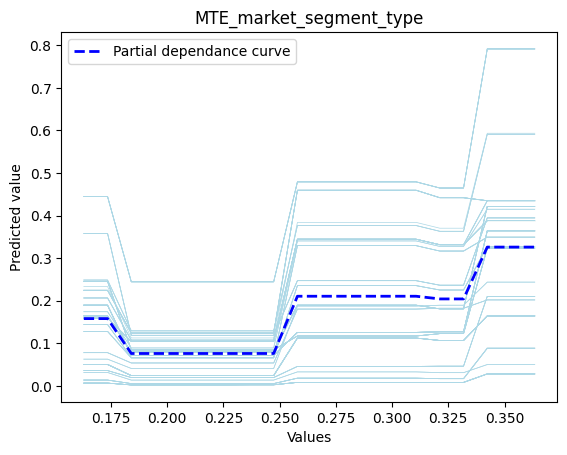

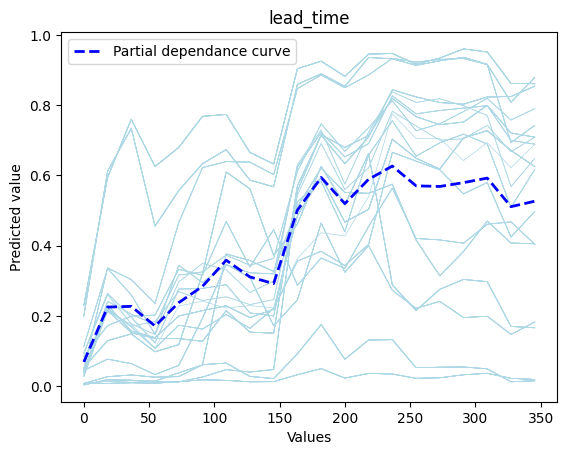

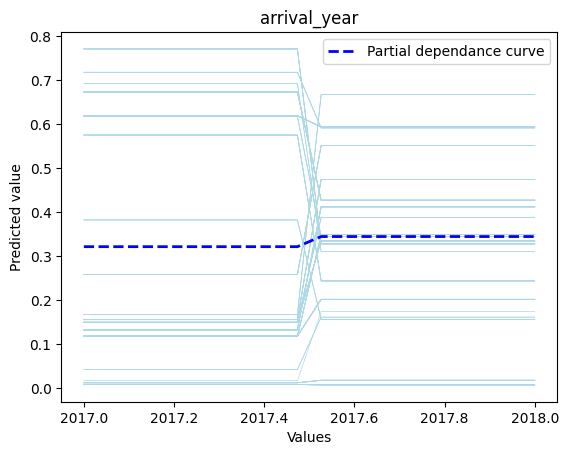

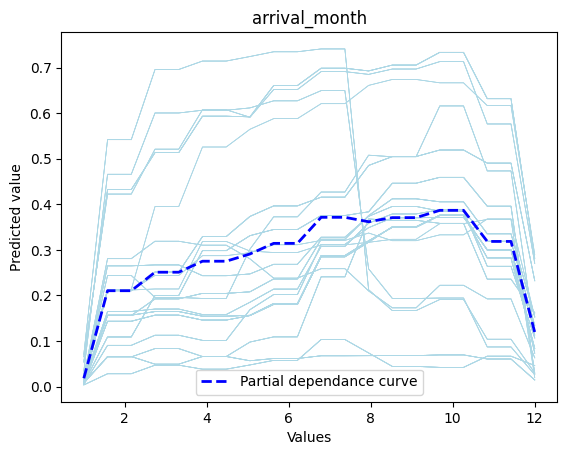

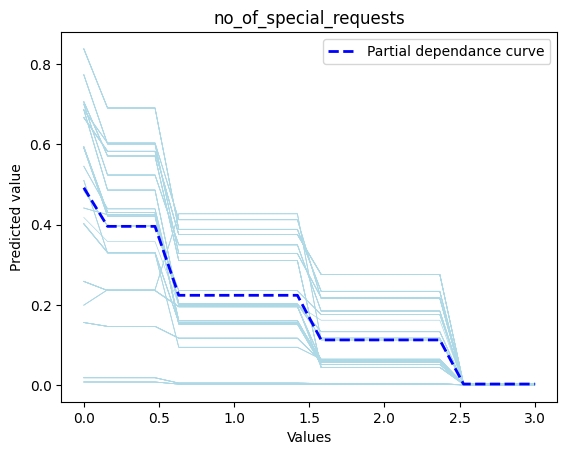

In [74]:
n_plots = 100
cols_to_plot = ['MTE_market_segment_type',
'lead_time',
'arrival_year',
'arrival_month',
'no_of_special_requests',
        ]

sampled_data = data.sample(n=10000, random_state=22)

for pred in cols_to_plot:
    x, ice_data_plot = ice_data(booster, sampled_data[cols_pred], pred)

    idx = np.random.randint(len(x), size=n_plots)
    plt.plot(x, np.transpose(ice_data_plot[idx,:]), lw = 0.5, color = 'lightblue')
    plt.plot(x, np.average(ice_data_plot[idx,:], axis = 0), lw = 2, ls = '--', color = 'blue', label = 'Partial dependance curve')
    plt.title(pred)
    plt.ylabel('Predicted value')
    plt.xlabel('Values')
    plt.legend(loc='best')
    plt.show()

## SHAP


In [75]:
import shap
shap.initjs()

In [76]:
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(data[cols_pred])

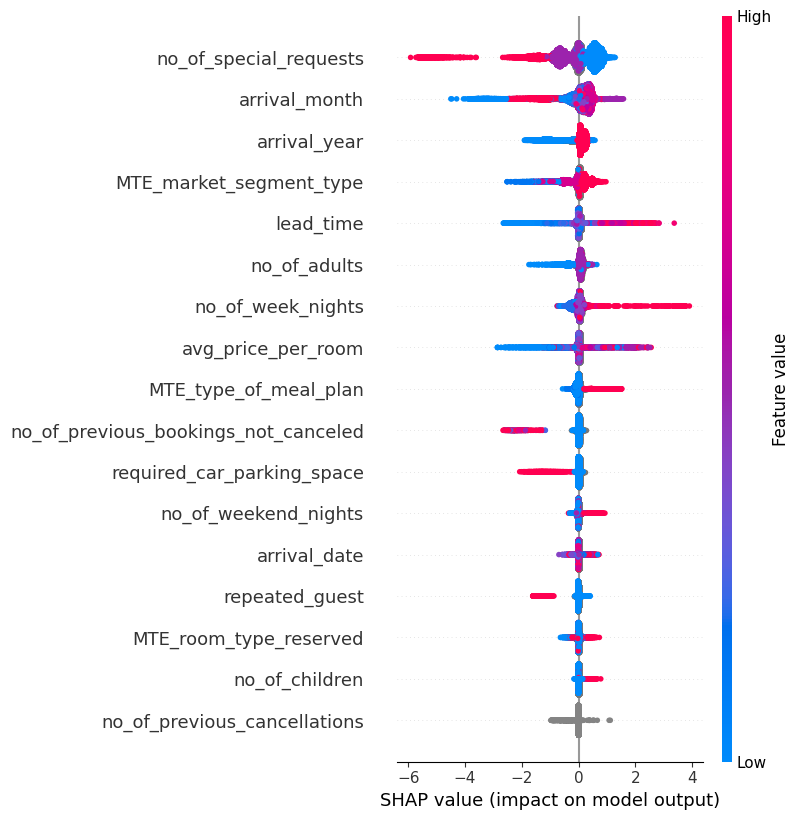

In [77]:
plt.figure()
shap.summary_plot(shap_values, data[cols_pred], max_display=20, show=True)
plt.show()

In [78]:
# removal of predictors no_of_previous_cancellations and repeated_guest because of low impact

prec=["no_of_previous_cancellations","repeated_guest"]
cols_pred=[col for col in cols_pred if col not in prec]
#"no_of_previous_bookings_not_canceled"
#,,"MTE_room_type_reserved","arrival_date",
#,"no_of_children","arrival_date",,"no_of_children"

In [82]:
len(cols_pred)

15

In [83]:
cols_pred

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'MTE_type_of_meal_plan',
 'MTE_room_type_reserved',
 'MTE_market_segment_type']

In [84]:
shap.force_plot(explainer.expected_value, shap_values[0,:], data[cols_pred].iloc[0,:])

DimensionError: Length of features is not equal to the length of shap_values!

IndexError: list index out of range

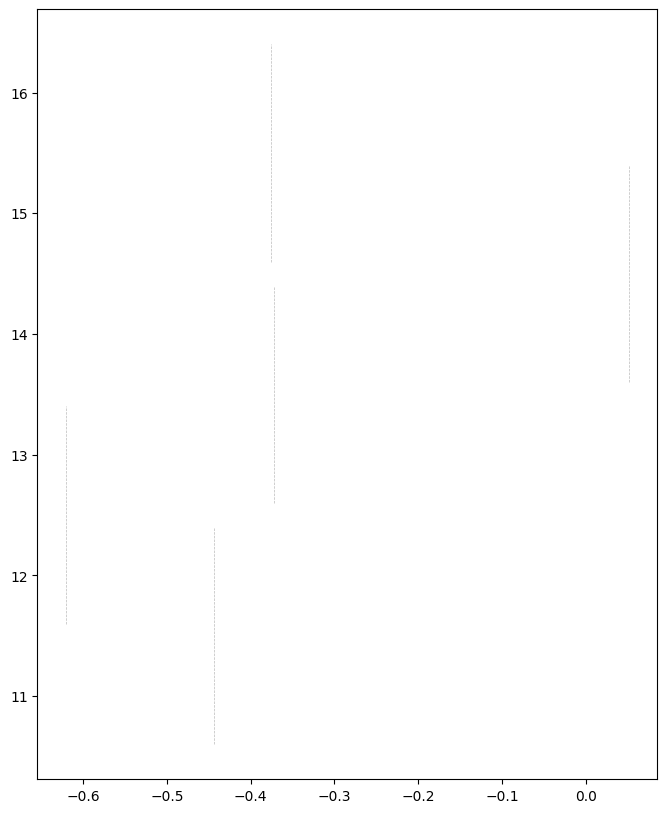

In [85]:
shap.plots._waterfall.waterfall_legacy(
    expected_value=explainer.expected_value, 
    shap_values=shap_values[0, :], 
    feature_names=cols_pred, 
    max_display=20
)

In [86]:
Xd = xgb.DMatrix(data[train_mask][cols_pred].iloc[:1000], data[train_mask][col_target].iloc[:1000])

explainer = shap.TreeExplainer(booster)
shap_interaction_values = explainer.shap_interaction_values(Xd)

XGBoostError: [16:51:49] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api_utils.h:125: Check failed: std::accumulate(shape.cbegin(), shape.cend(), static_cast<bst_ulong>(1), std::multiplies<>{}) == chunksize * rows (256000 vs. 324000) : 

In [87]:
plt.figure(figsize=(15,13))

sns.heatmap(
    data=np.mean(abs(shap_interaction_values[:, 0:20, 0:20]), axis=0), 
    annot=True, 
    fmt='.2f', 
    xticklabels=cols_pred[0:20], 
    yticklabels=cols_pred[0:20],
    cmap='winter',
    vmax=0.05
)

plt.show()

NameError: name 'shap_interaction_values' is not defined

<Figure size 1500x1300 with 0 Axes>

# Final model?

Once more grid search. After removing predictors that did not have impact. 

In [224]:
params_gs2 = {
    'eta': [0.01,0.1,0.2,0.3],
    'max_depth': [4,5,6],
    'subsample': [0.75,0.85,0.9],
    'colsample_bytree': [0.80,0.85,0.9],
    'lambda': [1,25,50],
    'gamma': [0,0.5, 1, 1.5],
}
params_gs2 = {
    'eta': [0.01,0.05,0.1,0.2,0.3],
    'max_depth': [5,6,7,8],
    'subsample': [0.75,0.85,0.9,0.95],
    'colsample_bytree': [0.80,0.9],
    'lambda': [1,25,50,100]
}


In [225]:
grid_search1 = GridSearchCV(
    xgb_estim, 
    param_grid = params_gs2,  
    scoring = 'roc_auc', 
    n_jobs = 1, 
    cv = skf.split(data[train_mask][cols_pred].values, data[train_mask][col_target].values), 
    verbose = 3, 
)

grid_search1.fit(data[cols_pred].values, data[col_target].values)

Fitting 2 folds for each of 640 candidates, totalling 1280 fits
[CV 1/2] END colsample_bytree=0.8, eta=0.01, lambda=1, max_depth=5, subsample=0.75;, score=0.783 total time=   0.2s
[CV 2/2] END colsample_bytree=0.8, eta=0.01, lambda=1, max_depth=5, subsample=0.75;, score=0.780 total time=   0.2s
[CV 1/2] END colsample_bytree=0.8, eta=0.01, lambda=1, max_depth=5, subsample=0.85;, score=0.782 total time=   0.2s
[CV 2/2] END colsample_bytree=0.8, eta=0.01, lambda=1, max_depth=5, subsample=0.85;, score=0.779 total time=   0.2s
[CV 1/2] END colsample_bytree=0.8, eta=0.01, lambda=1, max_depth=5, subsample=0.9;, score=0.782 total time=   0.2s
[CV 2/2] END colsample_bytree=0.8, eta=0.01, lambda=1, max_depth=5, subsample=0.9;, score=0.779 total time=   0.2s
[CV 1/2] END colsample_bytree=0.8, eta=0.01, lambda=1, max_depth=5, subsample=0.95;, score=0.782 total time=   0.2s
[CV 2/2] END colsample_bytree=0.8, eta=0.01, lambda=1, max_depth=5, subsample=0.95;, score=0.779 total time=   0.2s
[CV 1/2] E

GridSearchCV(cv=<generator object _BaseKFold.split at 0x000001710F8BAAB0>,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=N...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, nthread=1,
                                     num_parallel_tree=None, ...),
             n_jobs=1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'eta': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'lambda': [1, 25, 50, 100], 'max_depth': [5, 6, 7, 8],
                         'subsample': [0.75, 0.85, 0.9, 0.95]},
             scoring='roc_auc', verbose=3)

In [226]:
print(f'Best parameters:   {grid_search1.best_params_}')
grid_search1.cv_results_

Best parameters:   {'colsample_bytree': 0.8, 'eta': 0.1, 'lambda': 1, 'max_depth': 7, 'subsample': 0.95}


{'mean_fit_time': array([0.22869694, 0.22517586, 0.22222281, 0.22418141, 0.26805758,
        0.26652503, 0.269045  , 0.26653075, 0.31161416, 0.313375  ,
        0.31243682, 0.31290853, 0.37517333, 0.37321758, 0.37574315,
        0.37221932, 0.22979271, 0.22605431, 0.22720432, 0.22271609,
        0.26354849, 0.26210892, 0.26157415, 0.25957227, 0.30293167,
        0.30341005, 0.30240786, 0.30245233, 0.3512888 , 0.35094202,
        0.34830761, 0.3512876 , 0.22619462, 0.22471344, 0.2233628 ,
        0.22024632, 0.25762272, 0.2566092 , 0.25856233, 0.25661111,
        0.2959677 , 0.29843795, 0.29945529, 0.29944634, 0.34480619,
        0.34281135, 0.34530449, 0.34429228, 0.22370112, 0.22220027,
        0.22068501, 0.2191875 , 0.25360978, 0.25307584, 0.25610828,
        0.25408792, 0.29403484, 0.29096842, 0.28800082, 0.28698671,
        0.32571578, 0.32886457, 0.33034134, 0.34993875, 0.22014093,
        0.22122395, 0.21424544, 0.21273255, 0.24960923, 0.24759448,
        0.24711001, 0.24713898,

In [88]:
# Final model using xgb.train


params = {    
    #'colsample_bytree': 0.9, 'eta': 0.2, 'lambda': 1, 'max_depth': 5, 'subsample': 0.95,
    #'colsample_bytree': 0.8, 'eta': 0.1, 'gamma': 1, 'lambda': 1, 'max_depth': 6, 'subsample': 0.85,
    'colsample_bytree': 0.8, 'eta': 0.1, 'lambda': 1, 'max_depth': 7, 'subsample': 0.95,
    
    
    'eval_metric': 'auc',
    'objective': 'binary:logistic' ,
    'booster': 'gbtree',
    'tree_method': 'exact',

    'seed': 12
}

evals_result = {}
booster = xgb.train(
    params = params,
    dtrain = xgb.DMatrix(data[train_mask][cols_pred], data[train_mask][col_target]),
    num_boost_round = 1000,
    evals = (
        (xgb.DMatrix(data[train_mask][cols_pred], data[train_mask][col_target]), 'train'),
        (xgb.DMatrix(data[test_mask][cols_pred],  data[test_mask][col_target]), 'test'),
        (xgb.DMatrix(data[valid_mask][cols_pred], data[valid_mask][col_target]), 'valid')
    ),
    evals_result = evals_result,
    early_stopping_rounds = 10,
    verbose_eval = True
)

[0]	train-auc:0.75679	test-auc:0.73872	valid-auc:0.75641
[1]	train-auc:0.76716	test-auc:0.74886	valid-auc:0.75884
[2]	train-auc:0.77143	test-auc:0.75360	valid-auc:0.76380
[3]	train-auc:0.77250	test-auc:0.75419	valid-auc:0.76325
[4]	train-auc:0.79057	test-auc:0.76758	valid-auc:0.78403
[5]	train-auc:0.79145	test-auc:0.76936	valid-auc:0.78374
[6]	train-auc:0.79305	test-auc:0.77193	valid-auc:0.78439
[7]	train-auc:0.79459	test-auc:0.77157	valid-auc:0.78428
[8]	train-auc:0.80115	test-auc:0.77607	valid-auc:0.79176
[9]	train-auc:0.80635	test-auc:0.77942	valid-auc:0.79622
[10]	train-auc:0.80903	test-auc:0.78115	valid-auc:0.79877
[11]	train-auc:0.81113	test-auc:0.78197	valid-auc:0.80010
[12]	train-auc:0.81204	test-auc:0.78278	valid-auc:0.80132
[13]	train-auc:0.81289	test-auc:0.78254	valid-auc:0.80112
[14]	train-auc:0.81451	test-auc:0.78477	valid-auc:0.80321
[15]	train-auc:0.81577	test-auc:0.78521	valid-auc:0.80389
[16]	train-auc:0.81685	test-auc:0.78597	valid-auc:0.80523
[17]	train-auc:0.81792	t

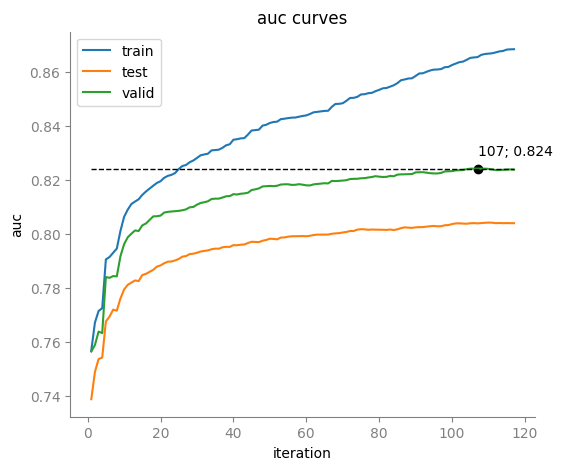

In [89]:
metric = 'auc'

fig = plt.figure(figsize=(6,5))
total_iteration_count = len(evals_result[list(evals_result.keys())[0]][metric])
for sample, vals in evals_result.items():
    plt.plot(
        range(1, total_iteration_count + 1), 
        vals[metric],
        label=sample
    )

best_score = booster.best_score
best_iteration = booster.best_iteration+1

plt.plot([1, total_iteration_count], [best_score, best_score], color='black', ls='--', lw=1)
plt.scatter([best_iteration], [best_score], color = 'black')
plt.annotate(
    '{:d}; {:0.3f}'.format(best_iteration, best_score), 
    xy = (best_iteration, best_score), 
    xytext = (best_iteration,best_score+0.005),
#     textcoords = 'offset points'
)
plt.xlabel('iteration')
plt.ylabel(metric)
plt.legend(loc='best')
plt.title(f'{metric} curves')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray')

plt.show()

In [91]:
# Final model using xgb.XGBClassifier


#customparams={'colsample_bytree': 0.8, 'eta': 0.1, 'gamma': 1, 'lambda': 1, 'max_depth': 6, 'subsample': 0.85}
customparams={'colsample_bytree': 0.8, 'eta': 0.1, 'lambda': 1, 'max_depth': 7, 'subsample': 0.95}

booster_sklearn_fin = xgb.XGBClassifier(
    **customparams,
    booster='gbtree',
    objective='binary:logistic',
    random_state=42,
    verbosity=1,
    eval_metric='auc',
    use_label_encoder=False,
    early_stopping_rounds=15,
)

booster_sklearn_fin.fit(
    data[train_mask][cols_pred].values, 
    data[train_mask][col_target].astype(int).values,
    eval_set=[
        (data[train_mask][cols_pred].values, data[train_mask][col_target].values),
        (data[test_mask][cols_pred].values, data[test_mask][col_target].values),
        (data[valid_mask][cols_pred].values, data[valid_mask][col_target].values),
    ],
    verbose=True,
)

[0]	validation_0-auc:0.75037	validation_1-auc:0.72528	validation_2-auc:0.73983
[1]	validation_0-auc:0.77824	validation_1-auc:0.75541	validation_2-auc:0.77012
[2]	validation_0-auc:0.78436	validation_1-auc:0.76092	validation_2-auc:0.77771
[3]	validation_0-auc:0.79325	validation_1-auc:0.76840	validation_2-auc:0.78942
[4]	validation_0-auc:0.79509	validation_1-auc:0.77005	validation_2-auc:0.79110
[5]	validation_0-auc:0.79600	validation_1-auc:0.77031	validation_2-auc:0.79104
[6]	validation_0-auc:0.79936	validation_1-auc:0.77253	validation_2-auc:0.79226
[7]	validation_0-auc:0.80380	validation_1-auc:0.77609	validation_2-auc:0.79662
[8]	validation_0-auc:0.80719	validation_1-auc:0.77908	validation_2-auc:0.80086
[9]	validation_0-auc:0.80788	validation_1-auc:0.77876	validation_2-auc:0.80088
[10]	validation_0-auc:0.80904	validation_1-auc:0.77860	validation_2-auc:0.80023
[11]	validation_0-auc:0.81162	validation_1-auc:0.78030	validation_2-auc:0.80234
[12]	validation_0-auc:0.81360	validation_1-auc:0.7

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=15,
              enable_categorical=False, eta=0.1, eval_metric='auc',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None, lambda=1,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, ...)

In [92]:
data_to_score['predicted_pd'] = booster.predict(xgb.DMatrix(data_to_score[cols_pred]), iteration_range=(0,booster.best_iteration))

In [93]:
# predicted_pd1 was only for our perpuses do not run these chucks.

data_to_score['predicted_pd1'] = booster_sklearn_fin.predict_proba(data_to_score[cols_pred], iteration_range=(0,booster_sklearn_fin.best_iteration))

ValueError: Expected a 1D array, got an array with shape (3593, 2)

In [94]:
data_to_score['booking_status']=1-data_to_score['predicted_pd1']

KeyError: 'predicted_pd1'

In [95]:
data_to_score

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,MTE_type_of_meal_plan,MTE_room_type_reserved,MTE_market_segment_type,predicted_pd
Booking_ID,,,,,,,,,,,,,,,,,,,,,
INN04969,2.0,NaN,1.0,0.0,Meal Plan 1,NaN,NaN,NaN,2017.0,8.0,23.0,NaN,NaN,0.0,NaN,NaN,3.0,0.310264,NaN,NaN,0.002880
INN34541,2.0,0.0,NaN,2.0,Meal Plan 1,0.0,NaN,NaN,2018.0,2.0,NaN,Offline,NaN,0.0,0.0,NaN,NaN,0.310264,NaN,0.303347,0.176304
INN36109,2.0,NaN,NaN,2.0,Meal Plan 1,0.0,NaN,NaN,2018.0,12.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.310264,NaN,NaN,0.117510
INN01554,2.0,NaN,0.0,3.0,NaN,0.0,NaN,NaN,2018.0,6.0,21.0,Online,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.363433,0.746750
INN24975,2.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2018.0,9.0,NaN,NaN,NaN,0.0,NaN,NaN,2.0,NaN,NaN,NaN,0.210482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN29523,1.0,NaN,NaN,2.0,Meal Plan 2,0.0,Room_Type 1,39.0,2017.0,8.0,NaN,Offline,NaN,0.0,NaN,87.00,NaN,0.439545,0.319822,0.303347,0.021467
INN25061,2.0,NaN,1.0,NaN,Not Selected,0.0,NaN,NaN,2018.0,6.0,NaN,Online,0.0,0.0,NaN,NaN,NaN,0.330534,NaN,0.363433,0.398669
INN08475,2.0,NaN,NaN,NaN,NaN,NaN,NaN,308.0,2018.0,11.0,NaN,Online,NaN,0.0,0.0,78.30,NaN,NaN,NaN,0.363433,0.936314


In [96]:
h=1-data_to_score['predicted_pd1']
h.head()

KeyError: 'predicted_pd1'

In [97]:
data_to_score['SCORE1'] = np.log(data_to_score['predicted_pd'] / (1 - data_to_score['predicted_pd']))

In [98]:
data_to_score['booking_status']=data_to_score['predicted_pd']

In [99]:
data_to_score['booking_status'].to_csv('export_score_xgb4.csv')